# Analysis of the libraries

Here we plot the major base frequency for different time points.
We also detect positions that consistently rise in frequency through time, i.e. positions that rise monotonously in frequency with time. Positions that only rise in frequency between the first and the last time points have not been investigated.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from array import array
import numpy as np
from scipy.stats import ttest_ind
%matplotlib inline

# Obtaining the sequence annotation

In [2]:
begins=[]
ends=[]
names =[]
with open ("sequence.gb") as f:
    in_pep = False
    for l in f:
        if "mat_peptide" in l:
            begins.append(int(l.split()[1].split("..")[0]))
            ends.append(int(l.split()[1].split("..")[1]))
            in_pep = True
        elif in_pep :
            names.append(l.split("=")[1])
            in_pep = False
            
print(begins)
print(ends)
print(names)

[108, 474, 753, 978, 2490, 3546, 4224, 4614, 6465, 6846, 6915, 7668]
[473, 752, 977, 2489, 3545, 4223, 4613, 6464, 6845, 6914, 7667, 10376]
['"capsid"\n', '"propeptide"\n', '"membrane"\n', '"envelope"\n', '"NS1"\n', '"NS2A"\n', '"NS2B"\n', '"NS3"\n', '"NS4A"\n', '"2K"\n', '"NS4B"\n', '"NS5"\n']


# Functions to plot interesting positions and gene boundaries

In [3]:
# Interesting positions
positions=[316,1670,1785,2340,5935,7172,8449,9165]
def plot_positions():
    for x in positions:
        plt.axvline(x=x, linewidth=1, linestyle=':')
        
def plot_genes():
    for i in range(len(begins)):
        plt.plot([begins[i], begins[i]], [0.99,1.0], linewidth=2, linestyle='-', color="black")
        if i%2==0:
            plt.text (begins[i] + ((ends[i] - begins[i])/10), 1.005, (names[i].replace('"', ''))[0:3], size='xx-small')
        else:
            plt.text (begins[i] + ((ends[i] - begins[i])/10), 1.015, (names[i].replace('"', ''))[0:3], size='xx-small')
    plt.plot([ends[-1], ends[-1]], [0.99,1.0], linewidth=2, linestyle='-', color="black")

# Functions to detect variants increasing in frequency

In [4]:
def is_increasing(minor_frequencies):
    #print(minor_frequencies)
    previous = minor_frequencies[0]
    for m in range(1,len(minor_frequencies)):
        if previous < minor_frequencies[m]:
            #print(str(previous) + " < " + str(minor_frequencies[m]))
            previous = minor_frequencies[m]
        else:
            return False
    return True

def get_variant_frequency(variant, table, i):
    sum_of_bases = table['As_quality_corrected'][i]+table['Cs_quality_corrected'][i]+table['Gs_quality_corrected'][i]+table['Ts_quality_corrected'][i]+table['Ns_quality_corrected'][i]
    if variant == "A":
        return table["As_quality_corrected"][i] / sum_of_bases
    elif variant == "C":
        return table["Cs_quality_corrected"][i] / sum_of_bases
    elif variant == "G":
        return table["Gs_quality_corrected"][i] / sum_of_bases
    elif variant == "T":
        return table["Ts_quality_corrected"][i] / sum_of_bases
    else:
        return np.nan
        

def get_increasing_variants(tables):
    num_tables = len(tables)
    first = tables[0]
    last = tables[num_tables-1]
    major = ""
    minor = ""
    major_frequencies = array('d',[0.0]*num_tables)
    minor_frequencies = array('d',[0.0]*num_tables)
    increasingVariants = dict()
    for i in first["Position"]:
        major = first["Major_variant"][i]
        #print(last['Major_variant_frequency_quality_corrected'][i])
        major_frequencies[0] = first['Major_variant_frequency_quality_corrected'][i]
        if major == last["Major_variant"][i]:
            minor = last["Second_variant"][i]
        else:
            minor = last["Major_variant"][i]
        minor_frequencies[0] = get_variant_frequency(minor, first, i)
        for table_id in range(1, num_tables):
            major_frequencies[table_id] = get_variant_frequency(major, tables[table_id], i)
            minor_frequencies[table_id] = get_variant_frequency(minor, tables[table_id], i)
        if is_increasing(minor_frequencies):
            increasingVariants[i] = [major_frequencies.tolist(), minor_frequencies.tolist()]
    return increasingVariants

# Overlay plot, control, replicate A

In [5]:
# Control runs, replicate A
DD3_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD3A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD6_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD6A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD9_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD9A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD12_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD12A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD24_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD24A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD51_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD51A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")

In [6]:
# Control runs, replicate D
DD3_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD3D_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD6_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD6D_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD9_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD9D_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD12_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD12D_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD24_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD24D_1_sequence.txt.assembled.fastq_mapped_AA.csv")

In [7]:
# Control runs, replicate E
DD6_E = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD6E_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD9_E = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD9E_1_sequence.txt.assembled.fastq_mapped_AA.csv")


In [8]:
# TLR3 activation runs, replicate A
TD9_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD9A_1_sequence.txt.assembled.fastq_mapped_AA.csv")
TD12_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD12A_1_sequence.txt.assembled.fastq_mapped_AA.csv")
TD24_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD24A_1_sequence.txt.assembled.fastq_mapped_AA.csv")
TD51_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD51A_1_sequence.txt.assembled.fastq_mapped_AA.csv")

In [9]:
#DD3_A.describe(include='all')

### Control, replicate A

In [10]:
tables_A = [DD3_A, DD6_A, DD9_A, DD12_A, DD24_A, DD51_A]
increasing_A = get_increasing_variants(tables_A)
print("There are "+str(len(increasing_A))+" positions that rise in frequency.")
print("Those are:")
print(increasing_A.keys())

There are 94 positions that rise in frequency.
Those are:
dict_keys([53, 55, 138, 165, 173, 316, 332, 357, 491, 824, 901, 1124, 1471, 1500, 1552, 1670, 1785, 1883, 1951, 2039, 2101, 2102, 2235, 2340, 2541, 2702, 2783, 2792, 2804, 2811, 3087, 3118, 3122, 3129, 3563, 3604, 4001, 4077, 4099, 4307, 4417, 4421, 4783, 4837, 4900, 4904, 5010, 5170, 5293, 5321, 5536, 5537, 5542, 5553, 5696, 5782, 5817, 5880, 5901, 6397, 6424, 6459, 6525, 6724, 6735, 6751, 6804, 6866, 6891, 6993, 7251, 7305, 7338, 8219, 8449, 8466, 8826, 8850, 8952, 9079, 9142, 9251, 9297, 9607, 9978, 10025, 10153, 10360, 10405, 10433, 10457, 10618, 10630, 10633])


/home/boussau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/home/boussau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


### Control, replicate D

In [11]:
tables_D = [DD3_D, DD6_D, DD9_D, DD12_D, DD24_D]
increasing_D = get_increasing_variants(tables_D)
print("There are "+str(len(increasing_D))+" positions that rise in frequency.")
print("Those are:")
print(increasing_D.keys())

/home/boussau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


There are 321 positions that rise in frequency.
Those are:
dict_keys([40, 138, 164, 176, 188, 207, 243, 254, 263, 295, 298, 433, 466, 531, 533, 535, 548, 570, 599, 664, 703, 731, 740, 796, 860, 957, 997, 1001, 1110, 1118, 1179, 1284, 1305, 1346, 1355, 1373, 1390, 1434, 1501, 1545, 1556, 1623, 1635, 1748, 1784, 1809, 1916, 1937, 1968, 1973, 2042, 2044, 2048, 2069, 2086, 2094, 2105, 2107, 2121, 2185, 2187, 2200, 2233, 2244, 2249, 2280, 2287, 2288, 2361, 2375, 2402, 2406, 2426, 2427, 2433, 2435, 2446, 2450, 2474, 2510, 2511, 2518, 2521, 2526, 2534, 2572, 2607, 2698, 2707, 2735, 2754, 2757, 2804, 2816, 2820, 2824, 2828, 2833, 2834, 2843, 2919, 2925, 2930, 2973, 2989, 2991, 3014, 3039, 3080, 3123, 3242, 3274, 3381, 3391, 3397, 3523, 3541, 3546, 3595, 3628, 3722, 3729, 3738, 3743, 3754, 3837, 3872, 3883, 3926, 3942, 3968, 3976, 4018, 4062, 4116, 4160, 4164, 4168, 4179, 4181, 4190, 4197, 4201, 4209, 4221, 4273, 4355, 4475, 4483, 4536, 4537, 4576, 4606, 4634, 4706, 4799, 4818, 4879, 4881, 4913

### Control, replicate E

In [12]:
tables_E = [DD6_E, DD9_E]
increasing_E = get_increasing_variants(tables_E)
print("There are "+str(len(increasing_E))+" positions that rise in frequency.")
print("There are too many of them, we choose not to print them.")

/home/boussau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


There are 6384 positions that rise in frequency.
There are too many of them, we choose not to print them.


### TLR3 treatment

In [13]:
tables_TA = [TD9_A, TD12_A, TD24_A, TD51_A]
increasing_TA = get_increasing_variants(tables_TA)
print("There are "+str(len(increasing_TA))+" positions that rise in frequency.")
print("Those are:")
print(increasing_TA.keys())

/home/boussau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
/home/boussau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


There are 241 positions that rise in frequency.
Those are:
dict_keys([84, 137, 146, 158, 168, 226, 233, 269, 285, 305, 415, 461, 486, 487, 520, 580, 628, 629, 647, 649, 719, 752, 832, 856, 877, 916, 917, 919, 941, 958, 974, 1003, 1028, 1085, 1088, 1121, 1137, 1149, 1181, 1205, 1319, 1321, 1328, 1339, 1344, 1392, 1403, 1445, 1524, 1525, 1546, 1618, 1620, 1622, 1633, 1745, 1747, 1750, 1756, 1785, 1874, 1888, 2117, 2193, 2243, 2265, 2309, 2356, 2373, 2409, 2425, 2428, 2435, 2442, 2472, 2492, 2495, 2503, 2598, 2609, 2720, 2733, 2864, 2873, 2950, 3007, 3145, 3258, 3300, 3417, 3482, 3547, 3553, 3608, 3641, 3644, 3658, 3696, 3709, 3746, 3797, 3805, 3831, 3837, 3890, 3904, 4084, 4288, 4302, 4347, 4360, 4363, 4474, 4502, 4564, 4606, 4797, 4824, 4836, 4842, 4849, 4897, 4900, 4925, 4974, 5032, 5056, 5108, 5186, 5252, 5278, 5307, 5332, 5449, 5494, 5675, 5691, 5747, 5821, 5848, 5887, 5934, 5935, 6032, 6037, 6087, 6317, 6505, 6551, 6553, 6562, 6588, 6593, 6682, 6691, 6701, 6708, 6737, 6760, 6793, 68

## Plotting only positions that consistently rise in frequency, control, replicate A

Here we plot the frequency of the major variant at day 51 in the control experiment, A. We color the dots according to whether they were consistently rising in frequency or not.

In [14]:
sns.set_palette("hls")
sns.set_context("poster")

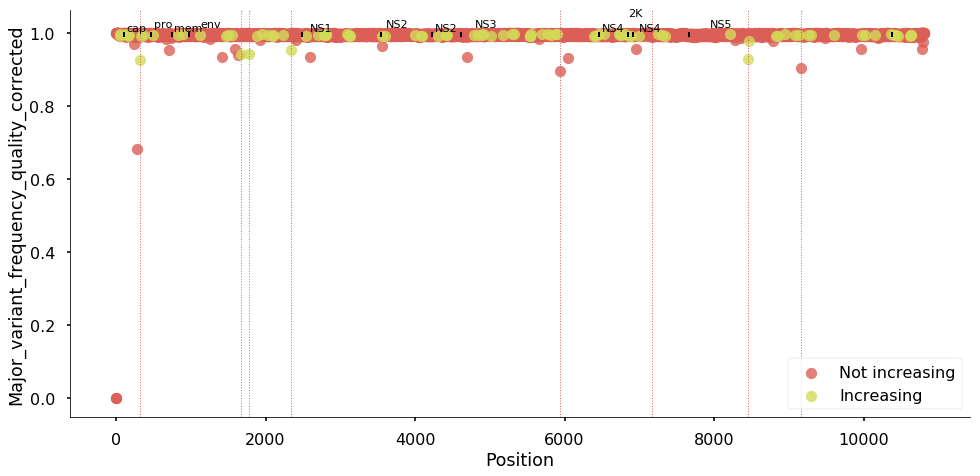

In [15]:
increasing_A_keys = increasing_A.keys()
is_increasing = []
for i in DD51_A['Position']:
    if i in increasing_A_keys:
        is_increasing.append("Increasing")
    else:
        is_increasing.append("Not increasing")
to_plot = pd.DataFrame ({'Position':DD51_A['Position'], 'Major_variant_frequency_quality_corrected':DD51_A ['Major_variant_frequency_quality_corrected'],'Is_increasing':is_increasing}) 
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=to_plot, fit_reg=False, hue='Is_increasing', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Increase per consistently increasing position

Here we plot the increase in frequency of the second variant, over the course of the entire  experiment, in the different replicates.

In [16]:
def plot_increase_per_increasing_position (increasing_list, last_table):
    increasing_list_keys = increasing_list.keys()
    increase = []
    is_increasing = []
    for i in last_table['Position']:
        if i in increasing_list_keys:
            increase.append(increasing_list[i][1][len(increasing_list[i][1])-1] - increasing_list[i][1][0])
            is_increasing.append("Increasing")
        else:
            increase.append(0.0)
            is_increasing.append("Not increasing")
    to_plot = pd.DataFrame ({'Position':last_table['Position'], 'Increase':increase,'Is_increasing':is_increasing}) 
    sns.lmplot( x="Position", y="Increase", data=to_plot, fit_reg=False, hue='Is_increasing', legend=False, size=7, aspect=2)
    plt.legend(loc='lower right')
    plot_positions()
    plot_genes()
    return


### Control, replicate A

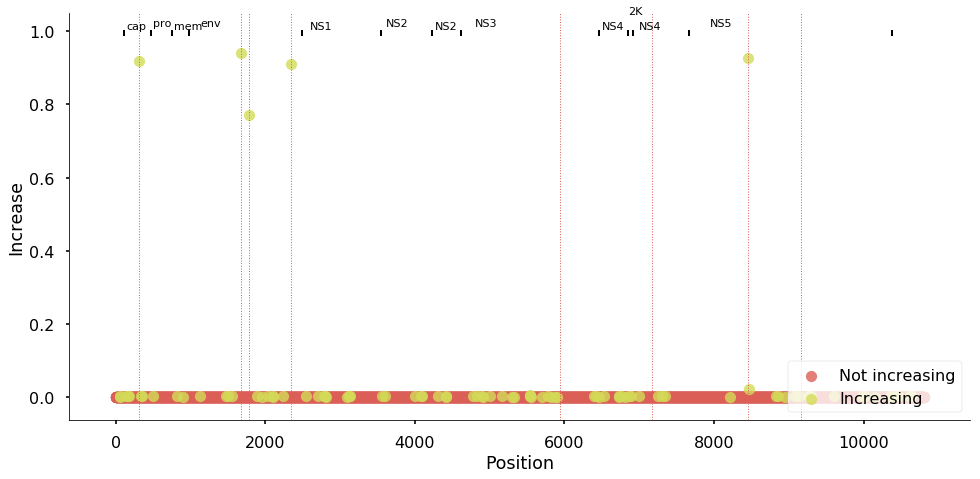

In [17]:
plot_increase_per_increasing_position (increasing_A, DD51_A)

### Control, replicate D:

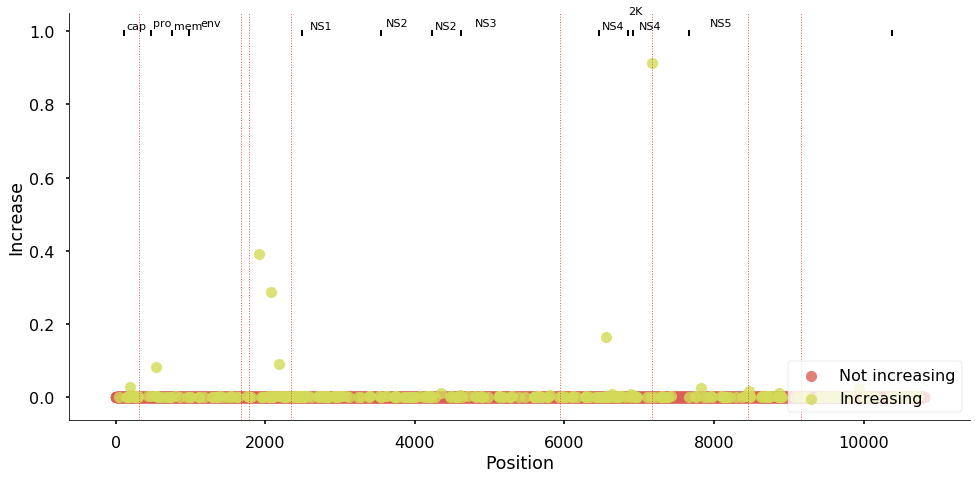

In [18]:
plot_increase_per_increasing_position (increasing_D, DD24_D)

### Control, replicate E (not to be trusted: only two time points):

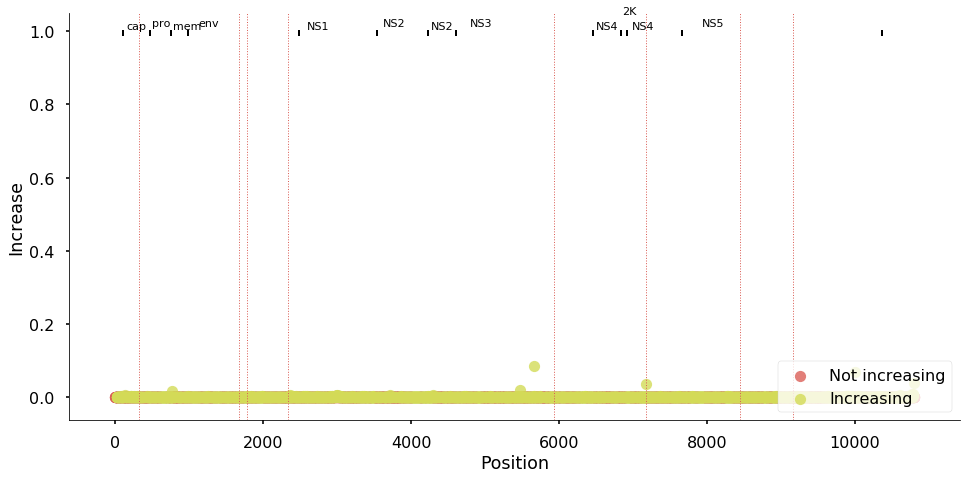

In [19]:
plot_increase_per_increasing_position (increasing_E, DD9_E)

### TLR3 treatment:

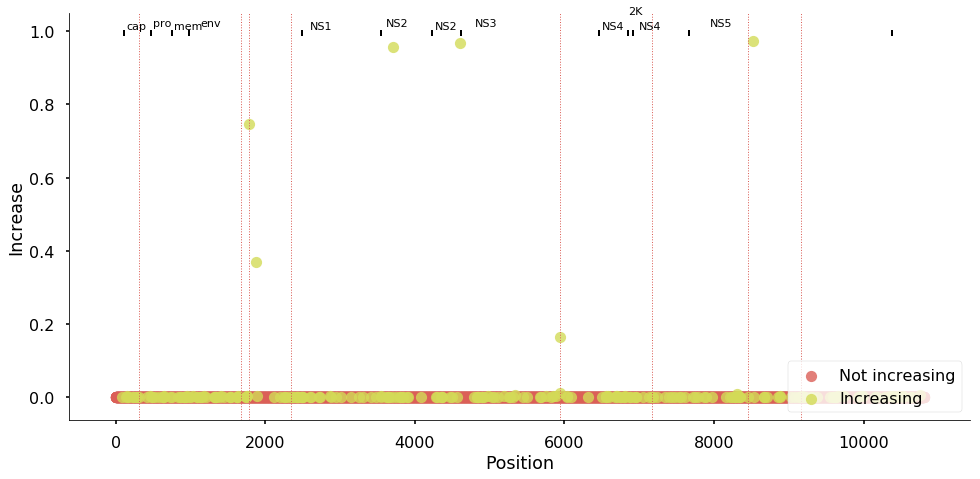

In [20]:
plot_increase_per_increasing_position (increasing_TA, TD51_A)

# Plots overlaying different time points

Here we plot the frequencies of the major variants, for the different time points of an experiment.

In [21]:
overlay_table =  pd.DataFrame ({'Position':DD3_A['Position'], 'DD3_A':DD3_A ['Major_variant_frequency_quality_corrected'], 'DD6_A':DD6_A ['Major_variant_frequency_quality_corrected'],'DD9_A':DD9_A ['Major_variant_frequency_quality_corrected'],'DD12_A':DD12_A ['Major_variant_frequency_quality_corrected'], 'DD24_A':DD24_A ['Major_variant_frequency_quality_corrected'], 'DD51_A':DD51_A ['Major_variant_frequency_quality_corrected']})
siz = len(DD3_A ['Position'])
sample = siz*["DD3A"]+siz*["DD6A"]+siz*["DD9A"]+siz*["DD12A"]+siz*["DD24A"]+siz*["DD51A"]

overlay_table_concat = pd.DataFrame ({'Position':pd.concat([DD3_A['Position'],DD6_A['Position'],DD9_A['Position'],DD12_A['Position'],DD24_A['Position'],DD51_A['Position']]), 'Major_variant_frequency_quality_corrected':pd.concat([DD3_A ['Major_variant_frequency_quality_corrected'],DD6_A ['Major_variant_frequency_quality_corrected'], DD9_A ['Major_variant_frequency_quality_corrected'],DD12_A ['Major_variant_frequency_quality_corrected'], DD24_A ['Major_variant_frequency_quality_corrected'], DD51_A ['Major_variant_frequency_quality_corrected'] ]), 'sample':sample})



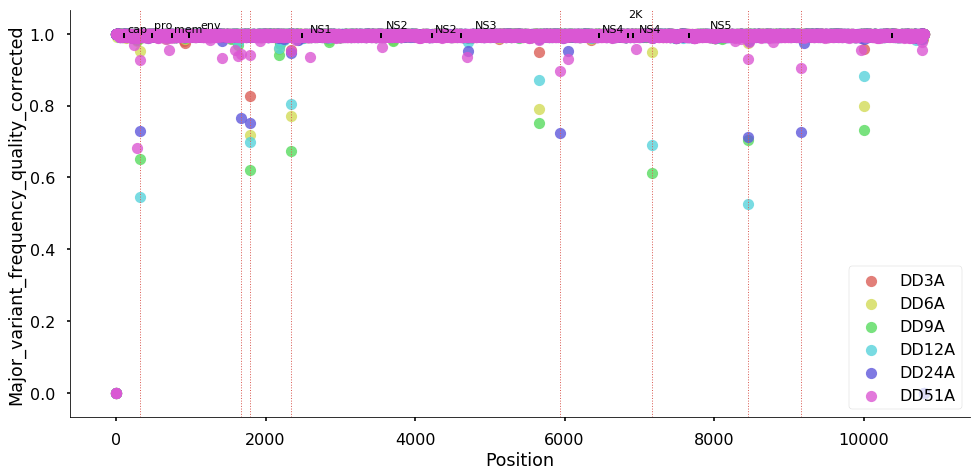

In [22]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

Same thing, smaller dots

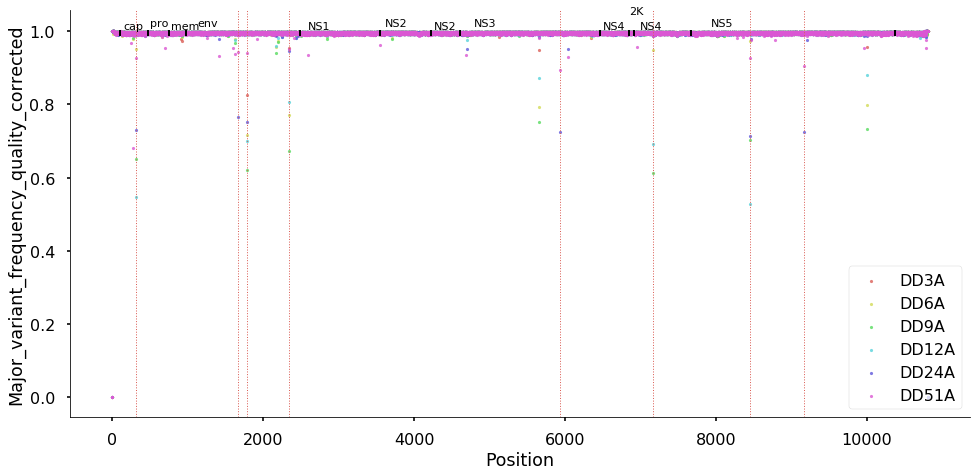

In [23]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, scatter_kws={"s": 10})
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Same thing, without sample at 51 days

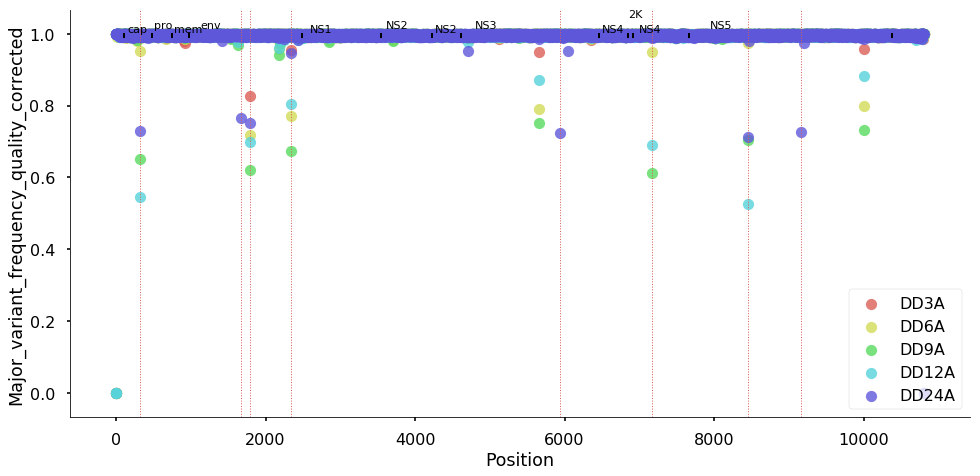

In [24]:
overlay_table_concat_no51 = overlay_table_concat.loc[overlay_table_concat['sample']!= "DD51A"]
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data= overlay_table_concat_no51, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

# Difference in frequency between day 3 and day 51?

Here we want to know if over all positions, the diversity has increased between day 3 and day 51. 

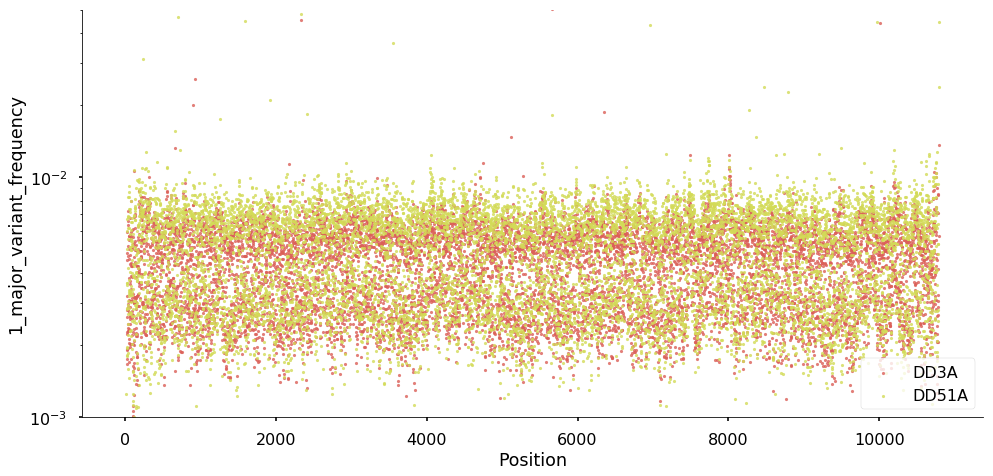

In [25]:
overlay_table_concat['1_major_variant_frequency'] = 1.0 - overlay_table_concat['Major_variant_frequency_quality_corrected']

#f, ax = plt.subplots(figsize=(10, 7))
#ax.set(yscale="log")

overlay_table_concat_nointer = overlay_table_concat.loc[ (overlay_table_concat['sample']!= "DD24A") & (overlay_table_concat['sample']!= "DD12A") & (overlay_table_concat['sample']!= "DD9A") & (overlay_table_concat['sample']!= "DD6A")]
lm=sns.lmplot( x="Position", y="1_major_variant_frequency", data=overlay_table_concat_nointer, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, scatter_kws={"s": 10})
axes = lm.axes
axes[0,0].set_ylim(0.001,0.05)
axes[0,0].set(yscale="log")

plt.legend(loc='lower right')
#plot_positions()
#plot_genes()

## Day 3 only

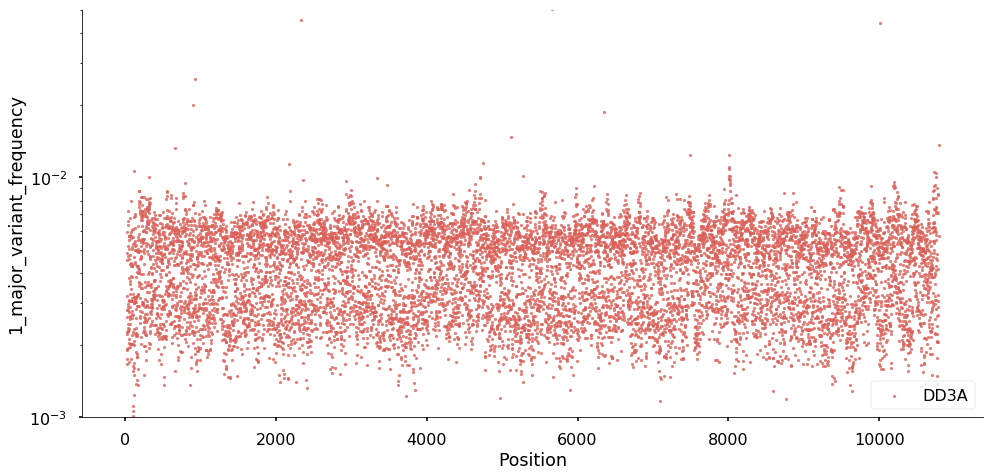

In [26]:
overlay_table_concat_nointer = overlay_table_concat.loc[ (overlay_table_concat['sample']!= "DD51A") &(overlay_table_concat['sample']!= "DD24A") & (overlay_table_concat['sample']!= "DD12A") & (overlay_table_concat['sample']!= "DD9A") & (overlay_table_concat['sample']!= "DD6A")]
lm=sns.lmplot( x="Position", y="1_major_variant_frequency", data=overlay_table_concat_nointer, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, scatter_kws={"s": 10})
axes = lm.axes
axes[0,0].set_ylim(0.001,0.05)
axes[0,0].set(yscale="log")

plt.legend(loc='lower right')
#plot_positions()
#plot_genes()

## Boxplot day 3-day 51

In [36]:
overlay_table_concat_nointer = overlay_table_concat.loc[ (overlay_table_concat['sample']!= "DD24A") & (overlay_table_concat['sample']!= "DD12A") & (overlay_table_concat['sample']!= "DD9A") & (overlay_table_concat['sample']!= "DD6A")]
print(overlay_table_concat_nointer.head())
print(overlay_table_concat).head()
f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
lm=sns.violinplot(x='sample', y="1_major_variant_frequency", data=overlay_table_concat_nointer,  hue='sample', ax=ax, bw=0.2)
axes = lm.axes
axes.set_ylim(0.001,0.05)
axes.set(yscale="log")

medians = overlay_table_concat_nointer.groupby(['sample'])['1_major_variant_frequency'].median().values
plt.axhline(y=medians[0], linewidth=1, linestyle=':')
plt.axhline(y=medians[1], linewidth=1, linestyle=':')
print(medians)
syn = overlay_table_concat_nointer['1_major_variant_frequency'][overlay_table_concat_nointer['sample']=="DD3A"]
nonsyn = overlay_table_concat_nointer['1_major_variant_frequency'][overlay_table_concat_nointer['sample']=="DD51A"]
print("T-test p-value: "+str(ttest_ind(syn, nonsyn)[1]))
print((syn).median())
print((nonsyn).median())
# giving title to the plot
plt.title("Diversity through time");


   Major_variant_frequency_quality_corrected  Position sample  \
0                                        0.0         0   DD3A   
1                                        0.0         1   DD3A   
2                                        0.0         2   DD3A   
3                                        1.0         3   DD3A   
4                                        1.0         4   DD3A   

   1_major_variant_frequency  
0                        1.0  
1                        1.0  
2                        1.0  
3                        0.0  
4                        0.0  
       Major_variant_frequency_quality_corrected  Position sample  \
0                                       0.000000         0   DD3A   
1                                       0.000000         1   DD3A   
2                                       0.000000         2   DD3A   
3                                       1.000000         3   DD3A   
4                                       1.000000         4   DD3A   
5        

AttributeError: 'NoneType' object has no attribute 'head'

### KDE plot

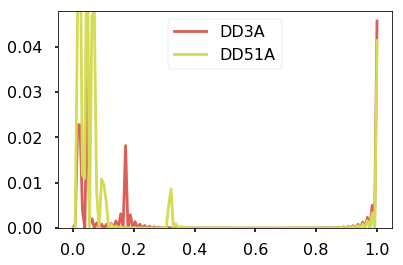

In [29]:
temp = (overlay_table_concat_nointer.loc[(overlay_table_concat_nointer['sample']!= "DD51A")])
del temp['sample']
del temp['Major_variant_frequency_quality_corrected']
del temp['Position']
#print(temp.describe())
#ax = sns.kdeplot("1_major_variant_frequency", data=temp)
sns.kdeplot(temp["1_major_variant_frequency"], label="DD3A")

temp = (overlay_table_concat_nointer.loc[(overlay_table_concat_nointer['sample']!= "DD3A")])
del temp['sample']
del temp['Major_variant_frequency_quality_corrected']
del temp['Position']
sns.kdeplot(temp["1_major_variant_frequency"], label="DD51A")


In the analyses above, based on the comparison between time points 3 and 51 of control experiment A, it would seem that the diversity, i.e. the amount of polymorphism, has increased a bit, as in Acevedo et al. 2014.

## Diversity through time plot, replicate A

Here we do the same type of analysis, but looking at all time points, not just 3 and 51.

Median values of the diversity per sample:
sample
DD3A     0.004337
DD6A     0.004300
DD9A     0.004197
DD12A    0.004650
DD24A    0.004664
DD51A    0.004941
Name: 1_major_variant_frequency, dtype: float64
Mean values of the diversity per sample:
sample
DD3A     0.004628
DD6A     0.004462
DD9A     0.004591
DD12A    0.005357
DD24A    0.005048
DD51A    0.005331
Name: 1_major_variant_frequency, dtype: float64


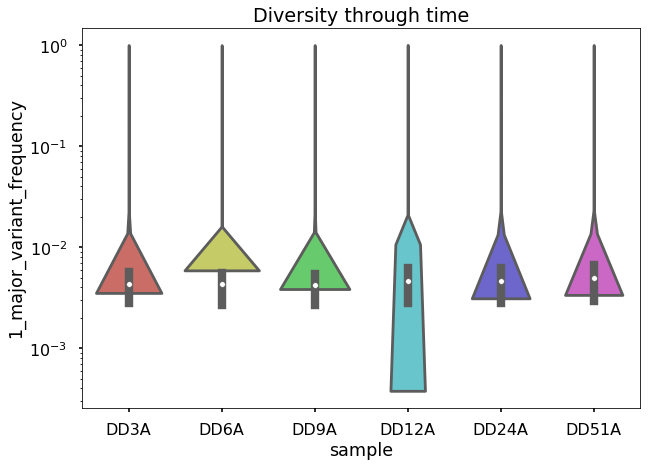

In [40]:
f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='sample', y="1_major_variant_frequency", data=overlay_table_concat,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Diversity through time");

medians = overlay_table_concat.groupby(['sample'], sort=False)['1_major_variant_frequency'].median()
print("Median values of the diversity per sample:" )
print(medians)
means = overlay_table_concat.groupby(['sample'], sort=False)['1_major_variant_frequency'].mean()
print("Mean values of the diversity per sample:" )
print(means)


The increase is no longer obvious, certainly not monotonous. If anything, what might be happening is that first diversity decreases from time points 3 to 9, then increases. If this is true, this could be compatible with a selective sweep in the first days, so that only some haplotypes carrying the variants with the high fitness increase in frequency.

## Same thing, Sample D

In [41]:

overlay_table =  pd.DataFrame ({'Position':DD3_D['Position'], 'DD3_D':DD3_D ['Major_variant_frequency_quality_corrected'], 'DD6_D':DD6_D ['Major_variant_frequency_quality_corrected'],'DD9_D':DD9_D ['Major_variant_frequency_quality_corrected'],'DD12_D':DD12_D ['Major_variant_frequency_quality_corrected'],'DD24_D':DD24_D ['Major_variant_frequency_quality_corrected']})
siz = len(DD3_D ['Position'])
sample = siz*["DD3D"]+siz*["DD6D"]+siz*["DD9D"]+siz*["DD12D"]+siz*["DD51D"]

overlay_table_concat = pd.DataFrame ({'Position':pd.concat([DD3_D['Position'],DD6_D['Position'],DD9_D['Position'],DD12_D['Position'],DD24_D['Position']]), 'Major_variant_frequency_quality_corrected':pd.concat([DD3_D ['Major_variant_frequency_quality_corrected'],DD6_D ['Major_variant_frequency_quality_corrected'], DD9_D ['Major_variant_frequency_quality_corrected'],DD12_D ['Major_variant_frequency_quality_corrected'], DD24_D ['Major_variant_frequency_quality_corrected'] ]), 'sample':sample})

overlay_table_concat['1_major_variant_frequency'] = 1.0 - overlay_table_concat['Major_variant_frequency_quality_corrected']



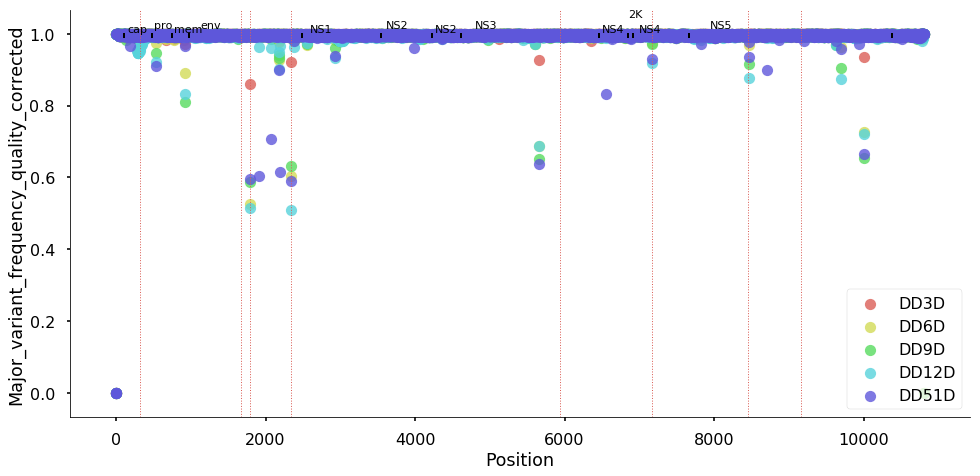

In [42]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Diversity through time plot, replicate D

Median values of the diversity per sample:
sample
DD3D     0.004186
DD6D     0.004450
DD9D     0.004750
DD12D    0.004845
DD51D    0.004713
Name: 1_major_variant_frequency, dtype: float64
Mean values of the diversity per sample:
sample
DD3D     0.004531
DD6D     0.004935
DD9D     0.005164
DD12D    0.005557
DD51D    0.005362
Name: 1_major_variant_frequency, dtype: float64


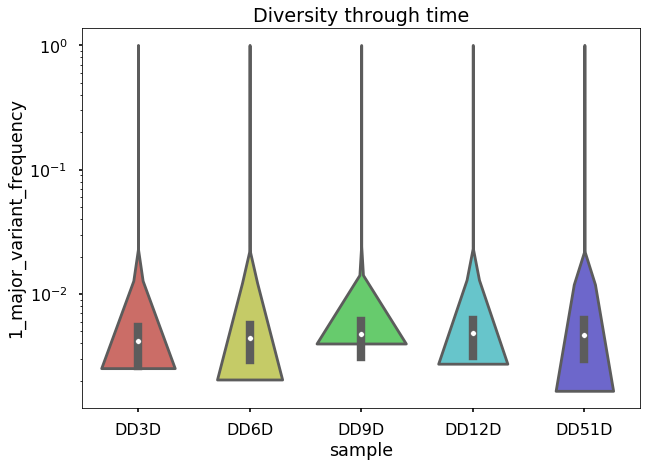

In [44]:
f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='sample', y="1_major_variant_frequency", data=overlay_table_concat,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Diversity through time");

medians = overlay_table_concat.groupby(['sample'], sort=False)['1_major_variant_frequency'].median()
print("Median values of the diversity per sample:" )
print(medians)
means = overlay_table_concat.groupby(['sample'], sort=False)['1_major_variant_frequency'].mean()
print("Mean values of the diversity per sample:" )
print(means)


In this case, it may be that the diversity increases then reaches some sort of plateau at about a median of 0.0047-0.0048.

## Same thing, sample E

In [45]:
siz = len(DD6_E ['Position'])
sample = siz*["DD6E"]+siz*["DD9E"]

overlay_table_concat = pd.DataFrame ({'Position':pd.concat([DD6_E['Position'],DD9_E['Position']]), 'Major_variant_frequency_quality_corrected':pd.concat([DD6_E ['Major_variant_frequency_quality_corrected'],DD9_E ['Major_variant_frequency_quality_corrected']]), 'sample':sample})
overlay_table_concat['1_major_variant_frequency'] = 1.0 - overlay_table_concat['Major_variant_frequency_quality_corrected']


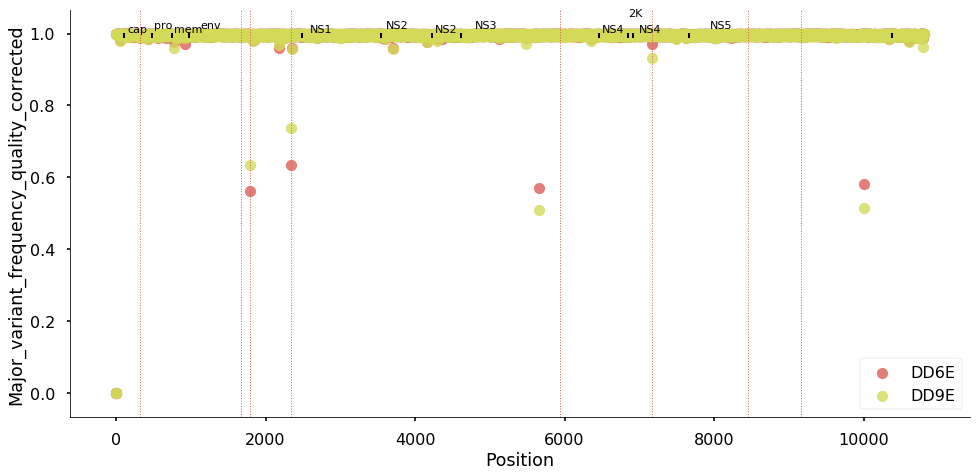

In [46]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Diversity through time plot, replicate E

Median values of the diversity per sample:
sample
DD6E    0.004326
DD9E    0.004504
Name: 1_major_variant_frequency, dtype: float64
Mean values of the diversity per sample:
sample
DD6E    0.004740
DD9E    0.004837
Name: 1_major_variant_frequency, dtype: float64


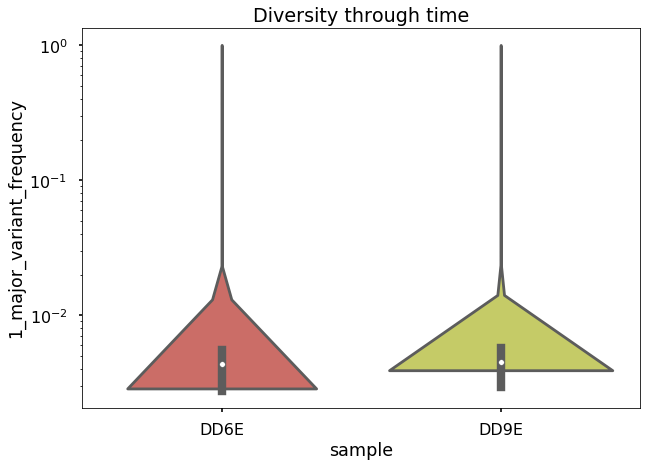

In [47]:

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='sample', y="1_major_variant_frequency", data=overlay_table_concat,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Diversity through time");

medians = overlay_table_concat.groupby(['sample'], sort=False)['1_major_variant_frequency'].median()
print("Median values of the diversity per sample:" )
print(medians)
means = overlay_table_concat.groupby(['sample'], sort=False)['1_major_variant_frequency'].mean()
print("Mean values of the diversity per sample:" )
print(means)

Although we only have two time points, the results are consistent with an increase in the first few days.

## Same thing, TLR3 activation

In [48]:
overlay_table =  pd.DataFrame ({'Position':TD9_A['Position'], 'TD9_A':TD9_A ['Major_variant_frequency_quality_corrected'], 'TD12_A':TD12_A ['Major_variant_frequency_quality_corrected'],'TD24_A':TD24_A ['Major_variant_frequency_quality_corrected'], 'TD51_A':TD51_A ['Major_variant_frequency_quality_corrected']})
siz = len(TD9_A ['Position'])
sample = siz*["TD9A"]+siz*["TD12A"]+siz*["TD24A"]+siz*["TD51A"]

overlay_table_concat = pd.DataFrame ({'Position':pd.concat([TD9_A['Position'],TD12_A['Position'],TD24_A['Position'],TD51_A['Position']]), 'Major_variant_frequency_quality_corrected':pd.concat([TD9_A['Major_variant_frequency_quality_corrected'],TD12_A['Major_variant_frequency_quality_corrected'],TD24_A['Major_variant_frequency_quality_corrected'],TD51_A['Major_variant_frequency_quality_corrected'] ]), 'sample':sample})
overlay_table_concat['1_major_variant_frequency'] = 1.0 - overlay_table_concat['Major_variant_frequency_quality_corrected']



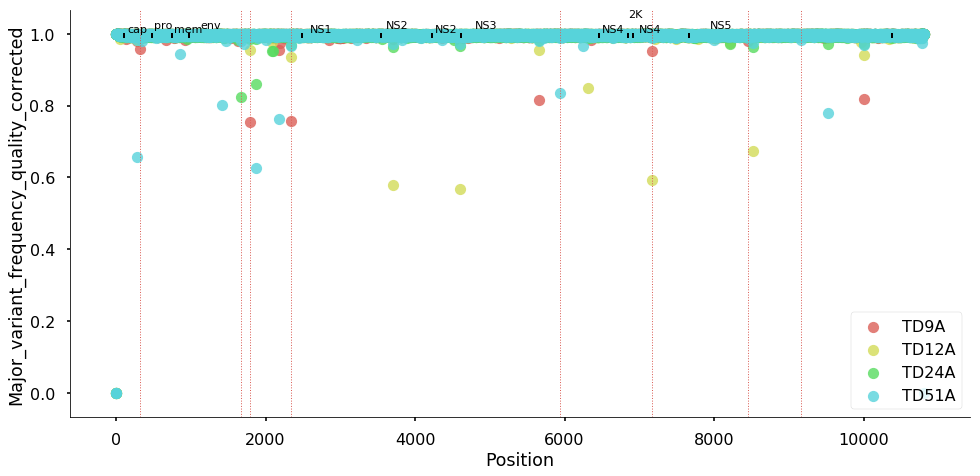

In [49]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Diversity through time plot, TLR3 activation

Median values of the diversity per sample:
sample
TD9A     0.004507
TD12A    0.004861
TD24A    0.004768
TD51A    0.004543
Name: 1_major_variant_frequency, dtype: float64
Mean values of the diversity per sample:
sample
TD9A     0.004674
TD12A    0.005343
TD24A    0.004901
TD51A    0.005073
Name: 1_major_variant_frequency, dtype: float64


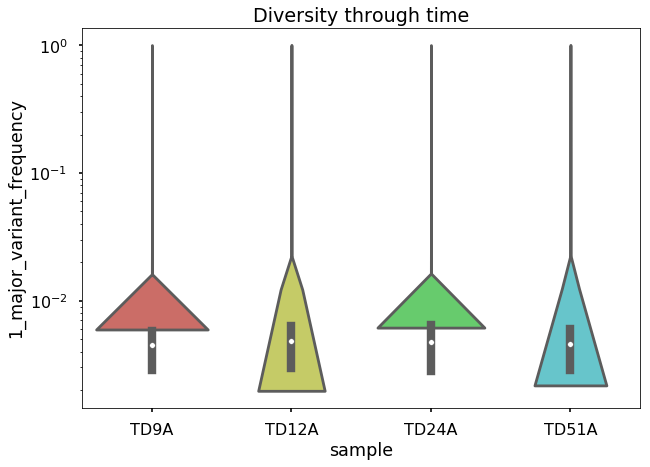

In [50]:
f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='sample', y="1_major_variant_frequency", data=overlay_table_concat,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Diversity through time");

medians = overlay_table_concat.groupby(['sample'], sort=False)['1_major_variant_frequency'].median()
print("Median values of the diversity per sample:" )
print(medians)
means = overlay_table_concat.groupby(['sample'], sort=False)['1_major_variant_frequency'].mean()
print("Mean values of the diversity per sample:" )
print(means)

The diversity initially increases, but then it may be decreasing between 24 and 51. Not clear with few time points and no replicate.

# Analysis of coverages: overlay and correlations

In [51]:
# construction of the data table
siz = len(DD3_A ['Coverage'])
sample = siz*["DD3A"]+siz*["DD6A"]+siz*["DD9A"]+siz*["DD12A"]+siz*["DD24A"]+siz*["DD51A"]
overlay_table_concat_DDA = pd.DataFrame ({'Position':pd.concat([DD3_A['Position'],DD6_A['Position'],DD9_A['Position'],DD12_A['Position'],DD24_A['Position'],DD51_A['Position']]), 'Coverage':pd.concat([DD3_A ['Coverage'],DD6_A ['Coverage'], DD9_A ['Coverage'],DD12_A ['Coverage'], DD24_A ['Coverage'], DD51_A ['Coverage'] ]), 'sample':sample})

siz = len(DD3_D ['Coverage'])
sample = siz*["DD3D"]+siz*["DD6D"]+siz*["DD9D"]+siz*["DD12D"]+siz*["DD51D"]
overlay_table_concat_DDD = pd.DataFrame ({'Position':pd.concat([DD3_D['Position'],DD6_D['Position'],DD9_D['Position'],DD12_D['Position'],DD24_D['Position']]), 'Coverage':pd.concat([DD3_D ['Coverage'],DD6_D ['Coverage'], DD9_D ['Coverage'],DD12_D ['Coverage'], DD24_D ['Coverage'] ]), 'sample':sample})

siz = len(DD6_E ['Coverage'])
sample = siz*["DD6E"]+siz*["DD9E"]
overlay_table_concat_DDE = pd.DataFrame ({'Position':pd.concat([DD6_E['Position'],DD9_E['Position']]), 'Coverage':pd.concat([DD6_E ['Coverage'],DD9_E ['Coverage']]), 'sample':sample})

siz = len(TD9_A ['Coverage'])
sample = siz*["TD9A"]+siz*["TD12A"]+siz*["TD24A"]+siz*["TD51A"]
overlay_table_concat_TD = pd.DataFrame ({'Position':pd.concat([TD9_A['Position'],TD12_A['Position'],TD24_A['Position'],TD51_A['Position']]), 'Coverage':pd.concat([TD9_A['Coverage'],TD12_A['Coverage'],TD24_A['Coverage'],TD51_A['Coverage'] ]), 'sample':sample})

overlay_table_concat=pd.concat([overlay_table_concat_DDA,overlay_table_concat_DDD, overlay_table_concat_DDE, overlay_table_concat_TD])

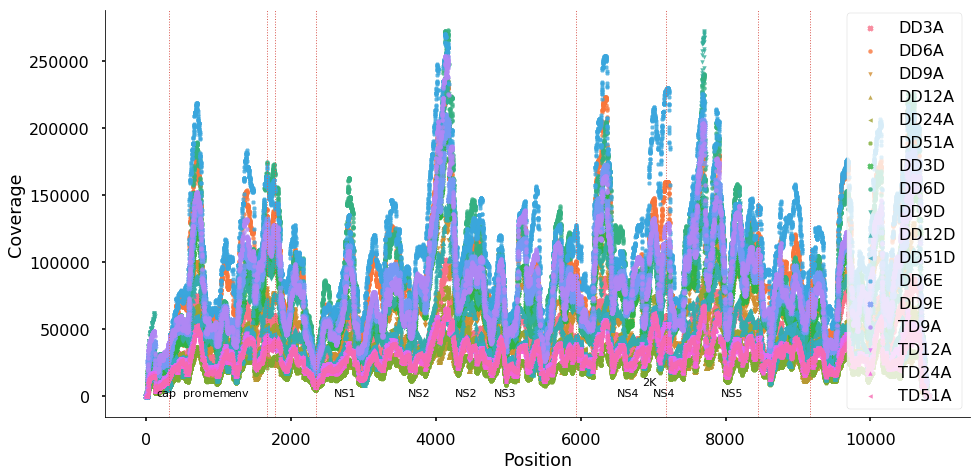

In [52]:
markers = ['x','o','v','^','<', '+', 'x','o','v','^','<', '+', 'x','o','v','^','<']
sns.lmplot( x="Position", y="Coverage", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True, markers=markers, scatter_kws={"s": 20})
plt.legend(loc='lower right')
plot_positions()
plot_genes()

In [53]:
siz = len(DD3_A ['Coverage'])
table_for_correlations = pd.DataFrame ({'DD3A':DD3_A ['Coverage'],'DD6_A':DD6_A['Coverage'], 'DD9_A':DD9_A ['Coverage'], 'DD12_A':DD12_A ['Coverage'], 'DD24_A':DD24_A ['Coverage'], 'DD51_A':DD51_A ['Coverage'],
                                        'DD3_D':DD3_D ['Coverage'],'DD6_D':DD6_D ['Coverage'], 'DD9_D':DD9_D ['Coverage'],'DD12_D':DD12_D ['Coverage'], 'DD24_D':DD24_D ['Coverage'],
                                        'DD6_E':DD6_E ['Coverage'], 'DD9_E':DD9_E ['Coverage'],
                                        'TD9_A':TD9_A['Coverage'],'TD12_A':TD12_A['Coverage'],'TD24_A':TD24_A['Coverage'],'TD51_A':TD51_A['Coverage'] })


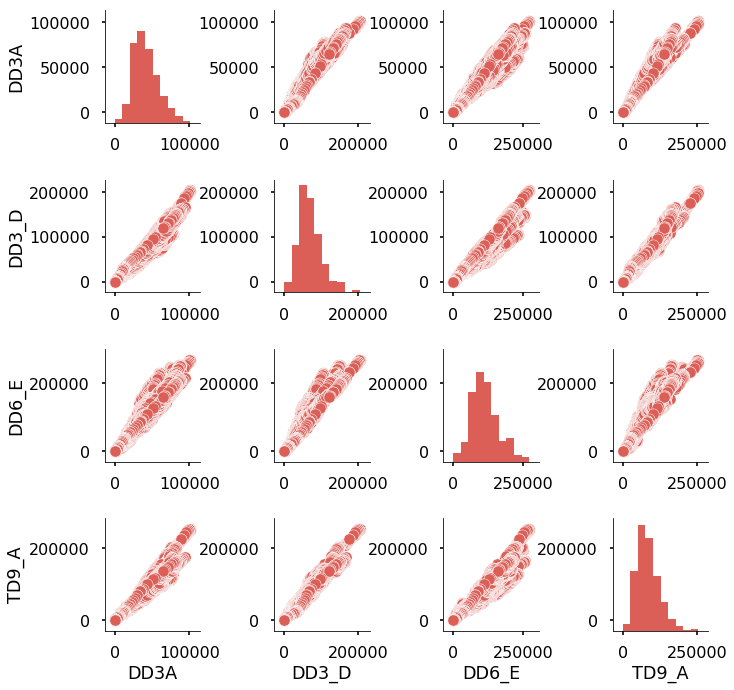

In [54]:
sns.pairplot(table_for_correlations, vars=['DD3A','DD3_D','DD6_E','TD9_A'], kind="scatter")

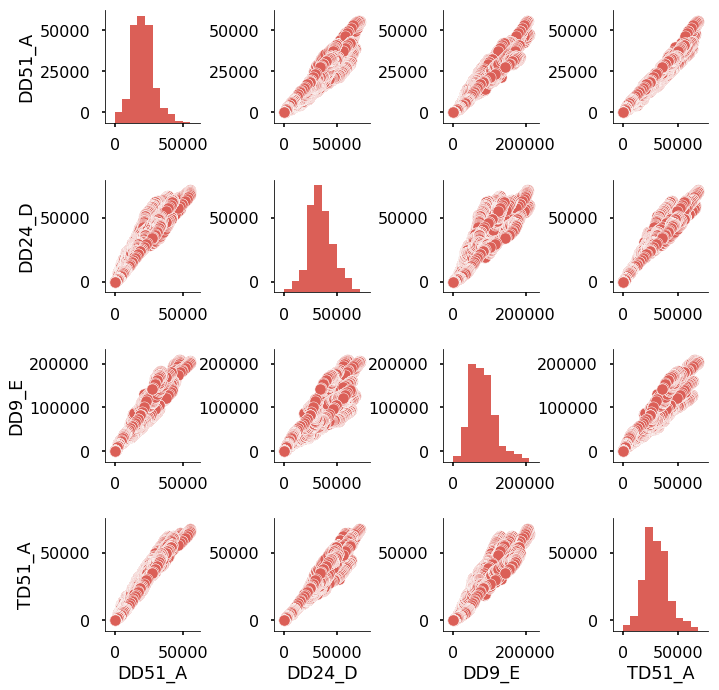

In [55]:
sns.pairplot(table_for_correlations, vars=['DD51_A','DD24_D','DD9_E','TD51_A'], kind="scatter")

Coverage values between samples seem to be quite correlated, although I have not plotted all pairwise correlations.

# Overlays of the major variant frequency per time point, across replicates

## Time point 3

In [56]:
# construction of the data table
siz = len(DD3_A ['Coverage'])
sample = len(DD3_A ['Coverage'])*["DD3A"]+len(DD3_D ['Coverage'])*["DD3D"]
overlay_table_concat_DD3 = pd.DataFrame ({'Position':pd.concat([DD3_A['Position'],DD3_D['Position']]), 'Major_variant_frequency_quality_corrected':pd.concat([DD3_A ['Major_variant_frequency_quality_corrected'],DD3_D ['Major_variant_frequency_quality_corrected']]), 'sample':sample})


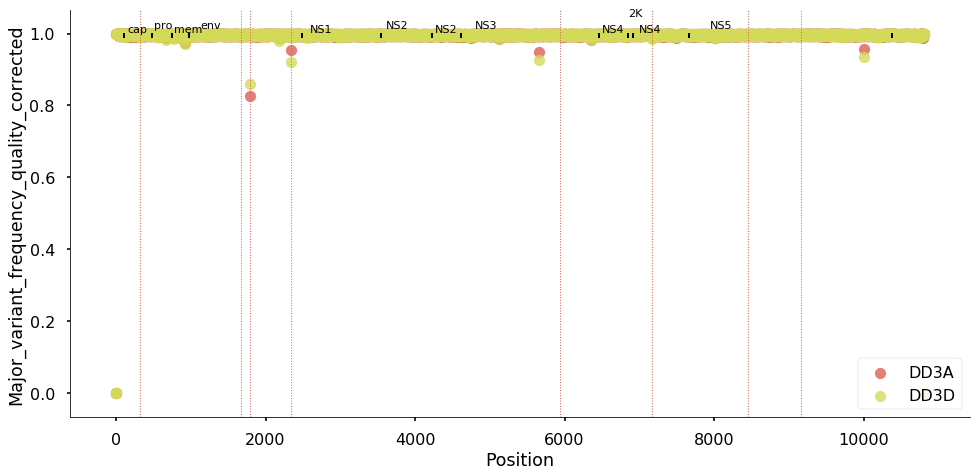

In [57]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat_DD3, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Time point 6

In [58]:
# construction of the data table
siz = len(DD6_A ['Coverage'])
sample = len(DD6_A ['Coverage'])*["DD6A"]+len(DD6_D ['Coverage'])*["DD6D"]+len(DD6_E ['Coverage'])*["DD6E"]
overlay_table_concat_DD6 = pd.DataFrame ({'Position':pd.concat([DD6_A['Position'],DD6_D['Position'],DD6_E['Position']]), 'Major_variant_frequency_quality_corrected':pd.concat([DD6_A ['Major_variant_frequency_quality_corrected'],DD6_D ['Major_variant_frequency_quality_corrected'],DD6_E ['Major_variant_frequency_quality_corrected']]), 'sample':sample})


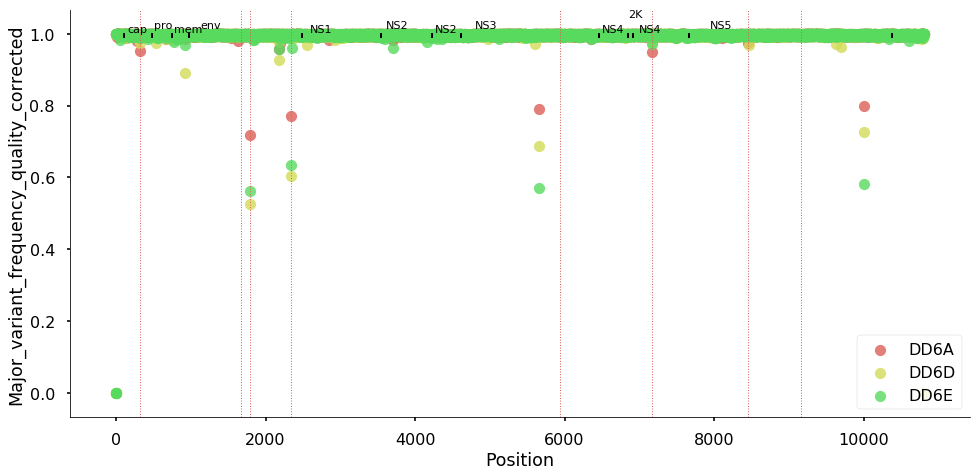

In [59]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat_DD6, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Time point 9

In [60]:
# construction of the data table
siz = len(DD9_A ['Coverage'])
sample = len(DD9_A ['Coverage'])*["DD9A"]+len(DD9_D ['Coverage'])*["DD9D"]+len(DD9_E ['Coverage'])*["DD9E"]
overlay_table_concat_DD9 = pd.DataFrame ({'Position':pd.concat([DD9_A['Position'],DD9_D['Position'],DD9_E['Position']]), 'Major_variant_frequency_quality_corrected':pd.concat([DD9_A ['Major_variant_frequency_quality_corrected'],DD9_D ['Major_variant_frequency_quality_corrected'],DD9_E ['Major_variant_frequency_quality_corrected']]), 'sample':sample})


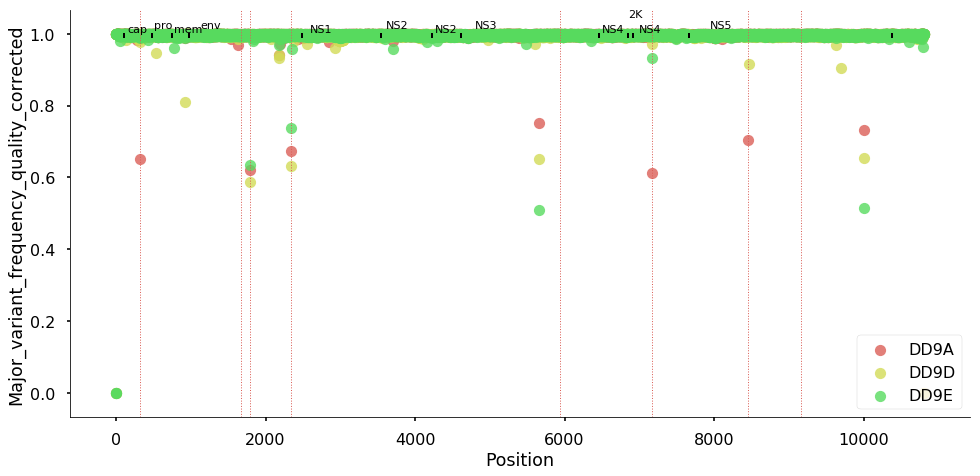

In [61]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat_DD9, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Time point 12

In [62]:
# construction of the data table
siz = len(DD12_A ['Coverage'])
sample = len(DD12_A ['Coverage'])*["DD12A"]+len(DD12_D ['Coverage'])*["DD12D"]
overlay_table_concat_DD12 = pd.DataFrame ({'Position':pd.concat([DD12_A['Position'],DD12_D['Position']]), 'Major_variant_frequency_quality_corrected':pd.concat([DD12_A ['Major_variant_frequency_quality_corrected'],DD12_D ['Major_variant_frequency_quality_corrected']]), 'sample':sample})


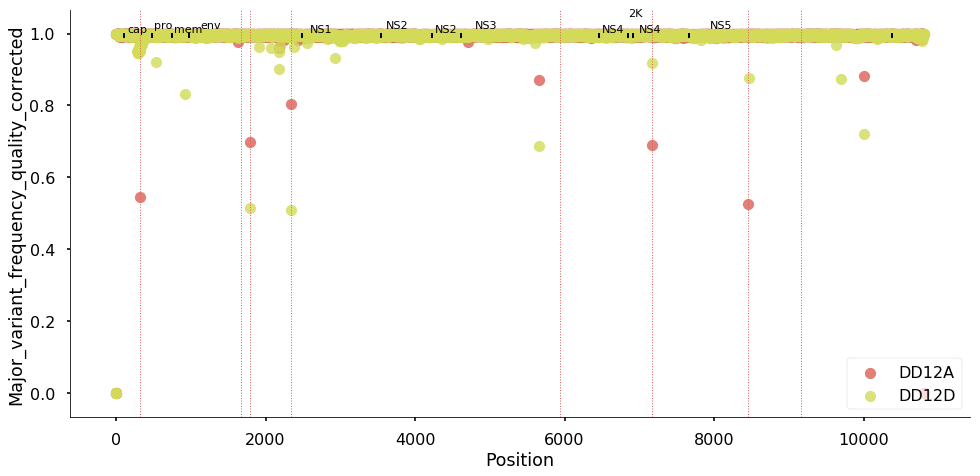

In [63]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat_DD12, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Time point 24

In [64]:
# construction of the data table
siz = len(DD24_A ['Coverage'])
sample = len(DD24_A ['Coverage'])*["DD24A"]+len(DD24_D ['Coverage'])*["DD24D"]
overlay_table_concat_DD24 = pd.DataFrame ({'Position':pd.concat([DD24_A['Position'],DD24_D['Position']]), 'Major_variant_frequency_quality_corrected':pd.concat([DD24_A ['Major_variant_frequency_quality_corrected'],DD24_D ['Major_variant_frequency_quality_corrected']]), 'sample':sample})


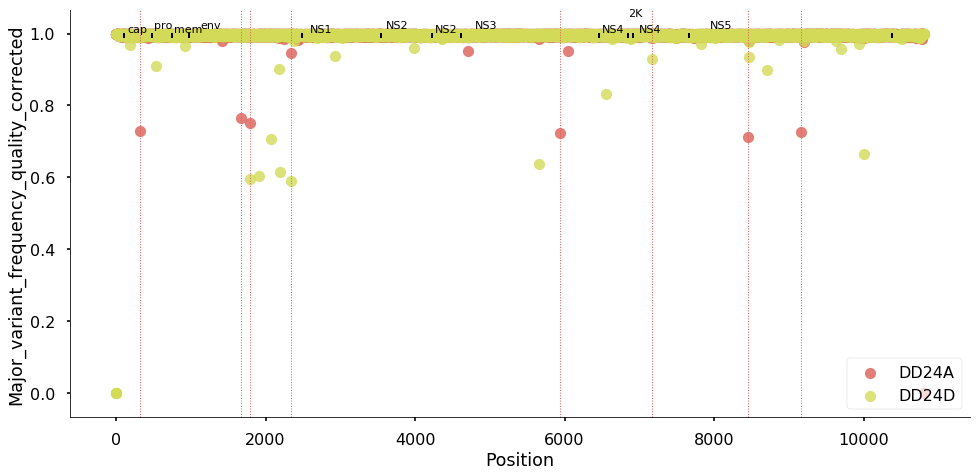

In [65]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=overlay_table_concat_DD24, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

# Synonymous and non-synonymous mutations

### Experiment A, day 3

In [66]:
DD3_A['null'] = (DD3_A['secondbase_aa']).isnull()


In [67]:
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous" 
DD3_A['synonymous'] = DD3_A.apply (lambda row: synonymous (row),axis=1)


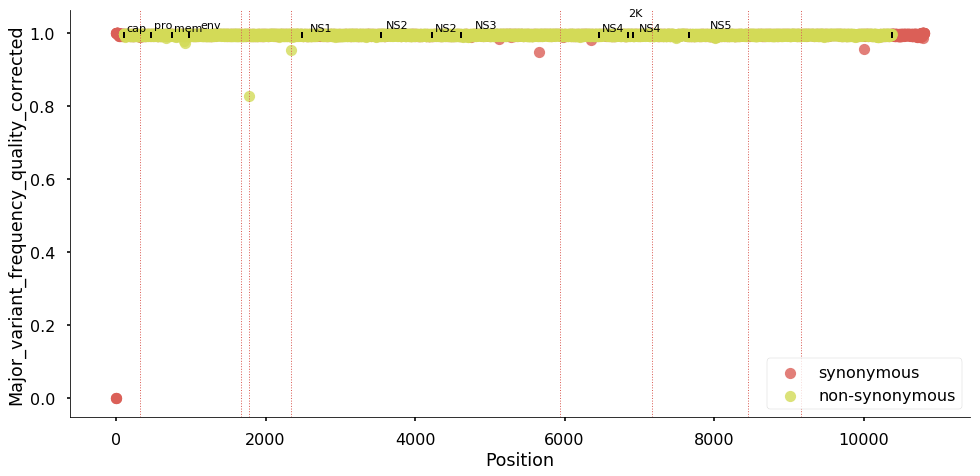

In [68]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=DD3_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### Experiment A, day 6

In [69]:
DD6_A['null'] = (DD6_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous" 
DD6_A['synonymous'] = DD6_A.apply (lambda row: synonymous (row),axis=1)


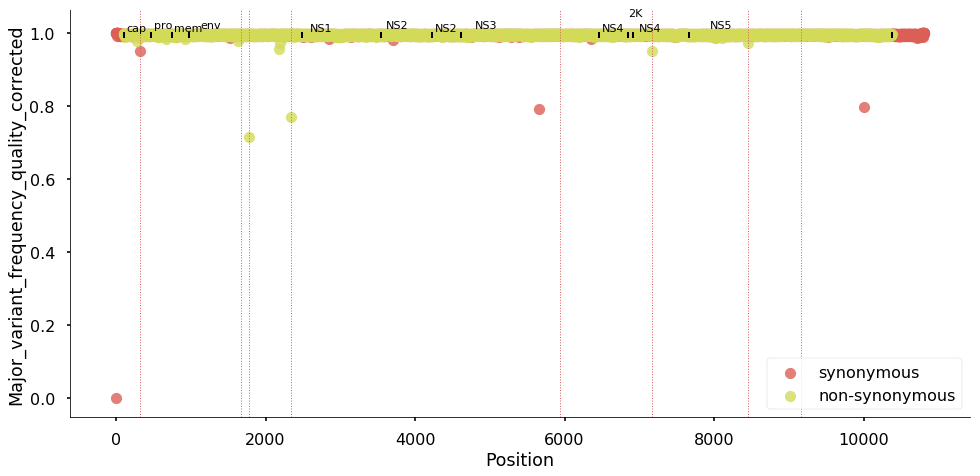

In [70]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=DD6_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()

### Experiment A, day 9

In [71]:
DD9_A['null'] = (DD9_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous" 
DD9_A['synonymous'] = DD9_A.apply (lambda row: synonymous (row),axis=1)


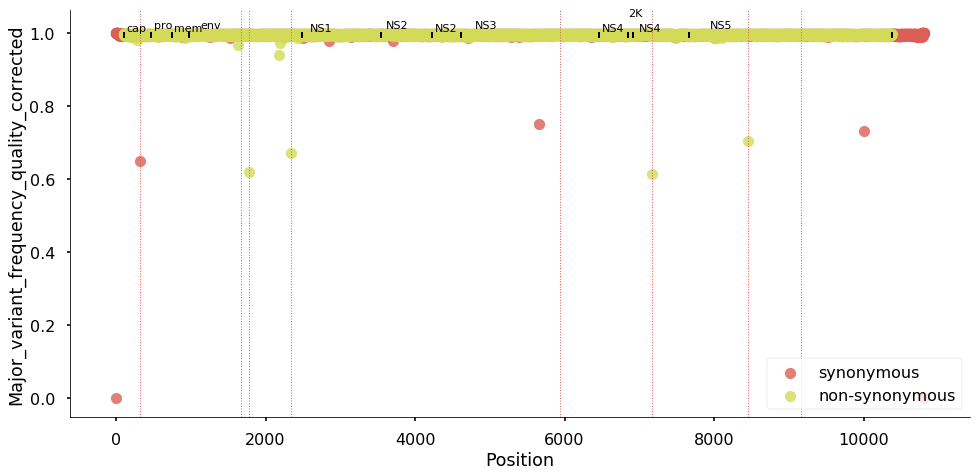

In [72]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=DD9_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()

### Experiment A, day 12

In [73]:
DD12_A['null'] = (DD12_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous" 
DD12_A['synonymous'] = DD12_A.apply (lambda row: synonymous (row),axis=1)


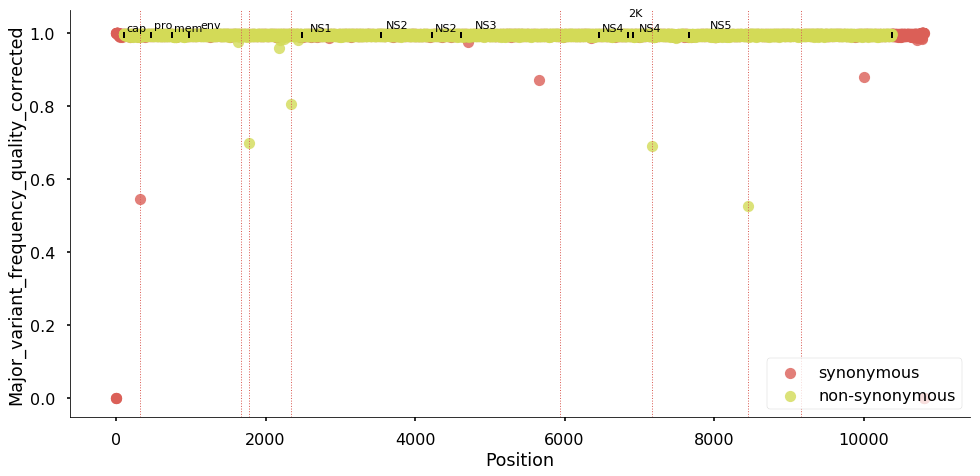

In [74]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=DD12_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()

### Experiment A, day 24

In [75]:
DD24_A['null'] = (DD24_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
DD24_A['synonymous'] = DD24_A.apply (lambda row: synonymous (row),axis=1)


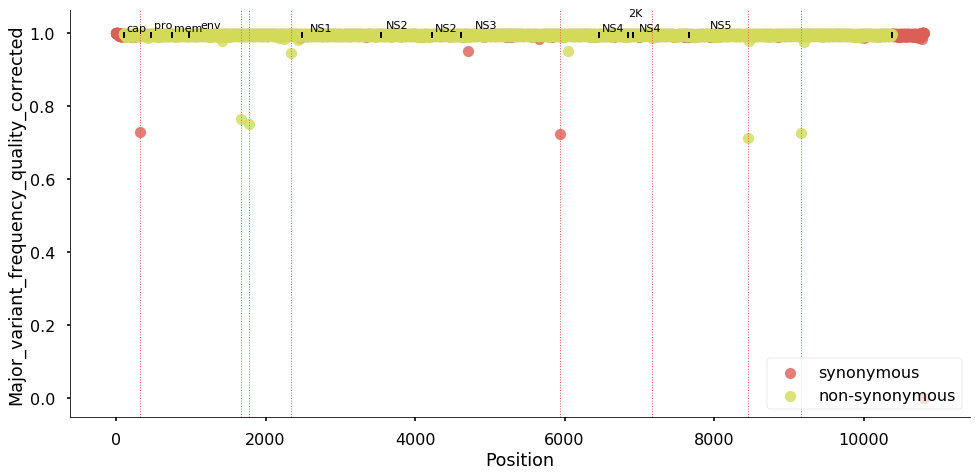

In [76]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=DD24_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### Experiment A, day 51

In [77]:
DD51_A['null'] = (DD51_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
DD51_A['synonymous'] = DD51_A.apply (lambda row: synonymous (row),axis=1)


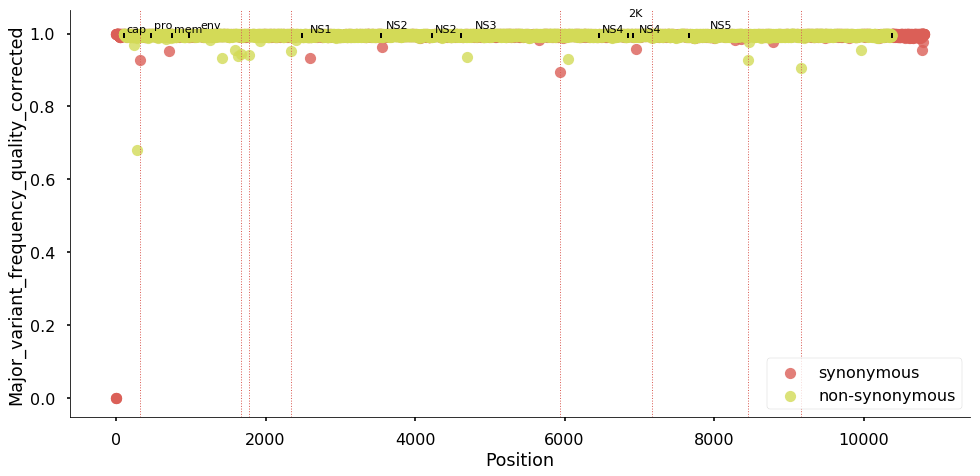

In [78]:
sns.lmplot( x="Position", y="Major_variant_frequency_quality_corrected", data=DD51_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


## Frequency of the second variant

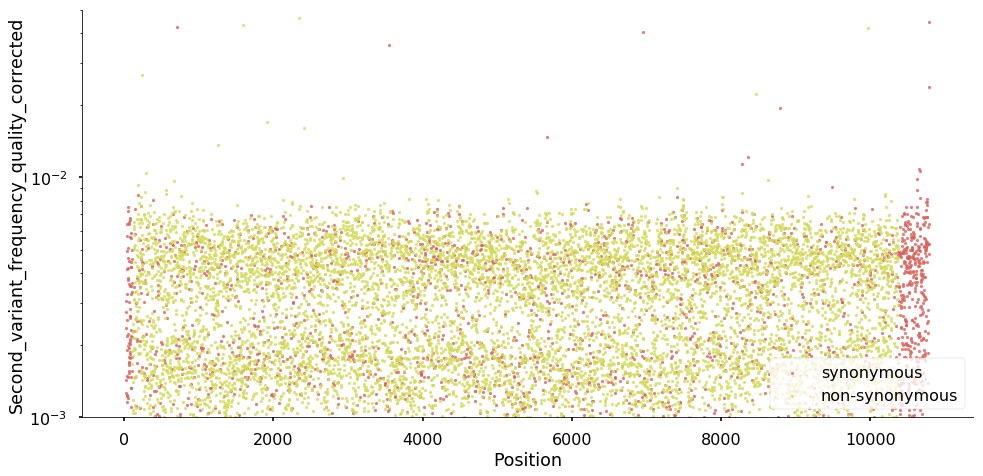

In [79]:

lm=sns.lmplot( x="Position", y="Second_variant_frequency_quality_corrected", data=DD51_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2, scatter_kws={"s": 10})
axes = lm.axes
axes[0,0].set_ylim(0.001,0.05)
axes[0,0].set(yscale="log")

plt.legend(loc='lower right')



#sns.lmplot( x="position", y="majorbase_ratio", data=DD51_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
#plt.legend(loc='lower right')


synonymous
non-synonymous    0.003032
synonymous        0.002671
Name: Second_variant_frequency_quality_corrected, dtype: float64
T-test p-value: 0.277844501149


Text(0.5,1,'Frequency of the second variant, synonymous vs non-synonymous, day 51')

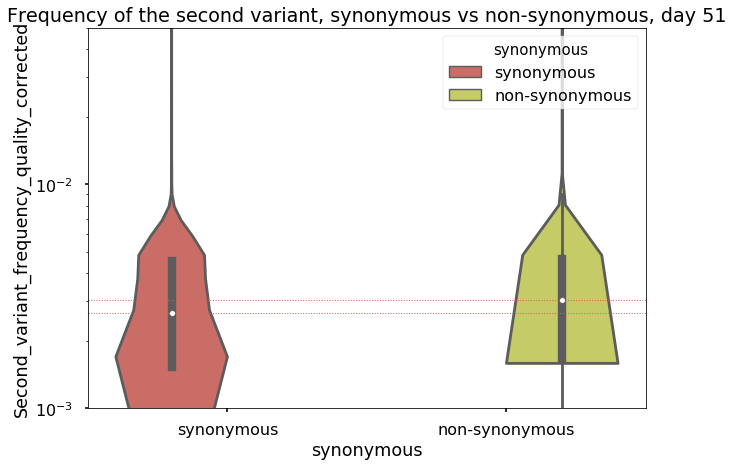

In [80]:
print( DD51_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median())
syn = DD51_A['Second_variant_frequency_quality_corrected'][DD51_A['synonymous']=="synonymous"]
nonsyn = DD51_A['Second_variant_frequency_quality_corrected'][DD51_A['synonymous']=="non-synonymous"]
print("T-test p-value: "+str(ttest_ind(syn, nonsyn)[1]))

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
lm=sns.violinplot(x='synonymous', y="Second_variant_frequency_quality_corrected", data=DD51_A,  hue='synonymous', ax=ax, bw=0.2)
axes = lm.axes
axes.set_ylim(0.001,0.05)
axes.set(yscale="log")

medians = DD51_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median().values
plt.axhline(y=medians[0], linewidth=1, linestyle=':')
plt.axhline(y=medians[1], linewidth=1, linestyle=':')
# giving title to the plot
plt.title("Frequency of the second variant, synonymous vs non-synonymous, day 51")


The difference in frequencies of the variants do not differ significantly between synonymous and non-synonymous variants at time point 51.

synonymous
non-synonymous    0.002968
synonymous        0.002605
Name: Second_variant_frequency_quality_corrected, dtype: float64
T-test p-value: 0.931816808252


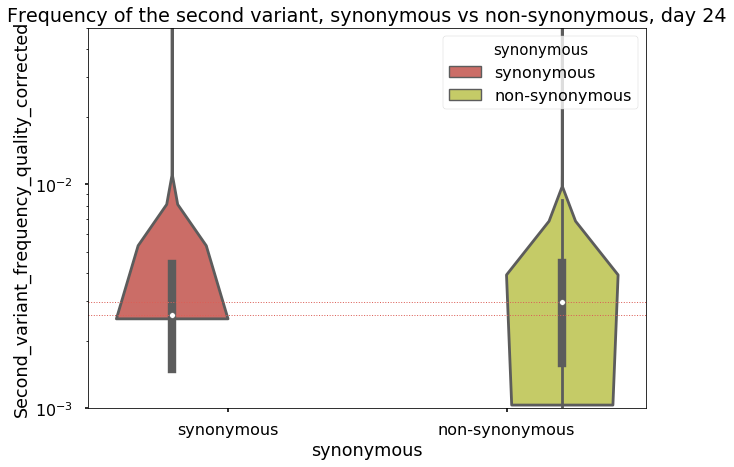

In [81]:
print( DD24_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median())
syn = DD24_A['Second_variant_frequency_quality_corrected'][DD24_A['synonymous']=="synonymous"]
nonsyn = DD24_A['Second_variant_frequency_quality_corrected'][DD24_A['synonymous']=="non-synonymous"]
print("T-test p-value: "+str(ttest_ind(syn, nonsyn)[1]))


f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
lm=sns.violinplot(x='synonymous', y="Second_variant_frequency_quality_corrected", data=DD24_A,  hue='synonymous', ax=ax, bw=0.2)
axes = lm.axes
axes.set_ylim(0.001,0.05)
axes.set(yscale="log")

medians = DD24_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median().values
plt.axhline(y=medians[0], linewidth=1, linestyle=':')
plt.axhline(y=medians[1], linewidth=1, linestyle=':')
# giving title to the plot
plt.title("Frequency of the second variant, synonymous vs non-synonymous, day 24");


The difference in frequencies of the variants do not differ significantly between synonymous and non-synonymous variants at time point 24.

synonymous
non-synonymous    0.003120
synonymous        0.002664
Name: Second_variant_frequency_quality_corrected, dtype: float64
T-test p-value: 0.84857732684


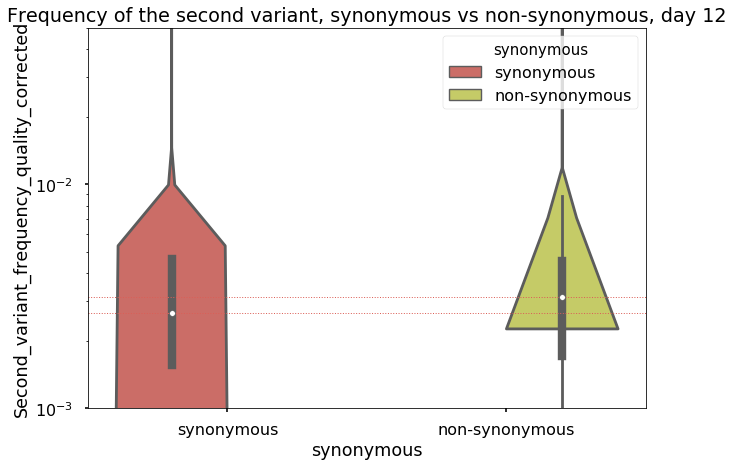

In [82]:
print( DD12_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median())
syn = DD12_A['Second_variant_frequency_quality_corrected'][DD12_A['synonymous']=="synonymous"]
nonsyn = DD12_A['Second_variant_frequency_quality_corrected'][DD12_A['synonymous']=="non-synonymous"]
print("T-test p-value: "+str(ttest_ind(syn, nonsyn)[1]))

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
lm=sns.violinplot(x='synonymous', y="Second_variant_frequency_quality_corrected", data=DD12_A,  hue='synonymous', ax=ax, bw=0.2)
axes = lm.axes
axes.set_ylim(0.001,0.05)
axes.set(yscale="log")

medians = DD12_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median().values
plt.axhline(y=medians[0], linewidth=1, linestyle=':')
plt.axhline(y=medians[1], linewidth=1, linestyle=':')
# giving title to the plot
plt.title("Frequency of the second variant, synonymous vs non-synonymous, day 12");


The difference in frequencies of the variants do not differ significantly between synonymous and non-synonymous variants at time point 12.

synonymous
non-synonymous    0.002987
synonymous        0.002717
Name: Second_variant_frequency_quality_corrected, dtype: float64
T-test p-value: 0.513497856777


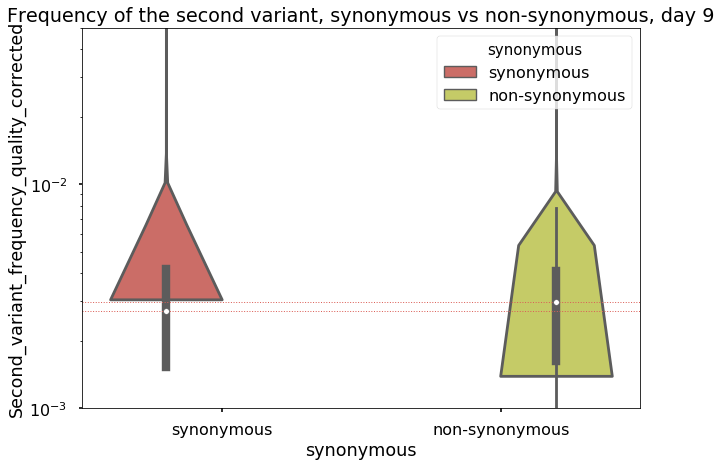

In [83]:
print( DD9_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median())
syn = DD9_A['Second_variant_frequency_quality_corrected'][DD9_A['synonymous']=="synonymous"]
nonsyn = DD9_A['Second_variant_frequency_quality_corrected'][DD9_A['synonymous']=="non-synonymous"]
print("T-test p-value: "+str(ttest_ind(syn, nonsyn)[1]))

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
lm=sns.violinplot(x='synonymous', y="Second_variant_frequency_quality_corrected", data=DD9_A,  hue='synonymous', ax=ax, bw=0.2)
axes = lm.axes
axes.set_ylim(0.001,0.05)
axes.set(yscale="log")

medians = DD9_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median().values
plt.axhline(y=medians[0], linewidth=1, linestyle=':')
plt.axhline(y=medians[1], linewidth=1, linestyle=':')
# giving title to the plot
plt.title("Frequency of the second variant, synonymous vs non-synonymous, day 9");


The difference in frequencies of the variants do not differ significantly between synonymous and non-synonymous variants at time point 9.

synonymous
non-synonymous    0.003118
synonymous        0.002731
Name: Second_variant_frequency_quality_corrected, dtype: float64
T-test p-value: 0.575956766906


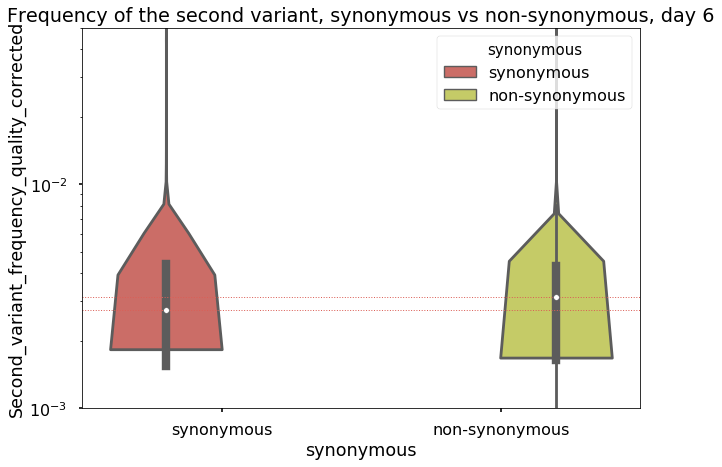

In [84]:
print( DD6_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median())
syn = DD6_A['Second_variant_frequency_quality_corrected'][DD6_A['synonymous']=="synonymous"]
nonsyn = DD6_A['Second_variant_frequency_quality_corrected'][DD6_A['synonymous']=="non-synonymous"]
print("T-test p-value: "+str(ttest_ind(syn, nonsyn)[1]))

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
lm=sns.violinplot(x='synonymous', y="Second_variant_frequency_quality_corrected", data=DD6_A,  hue='synonymous', ax=ax, bw=0.2)
axes = lm.axes
axes.set_ylim(0.001,0.05)
axes.set(yscale="log")

medians = DD6_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median().values
plt.axhline(y=medians[0], linewidth=1, linestyle=':')
plt.axhline(y=medians[1], linewidth=1, linestyle=':')
# giving title to the plot
plt.title("Frequency of the second variant, synonymous vs non-synonymous, day 6");


The difference in frequencies of the variants do not differ significantly between synonymous and non-synonymous variants at time point 6.

synonymous
non-synonymous    0.003042
synonymous        0.002719
Name: Second_variant_frequency_quality_corrected, dtype: float64
T-test p-value: 0.091147469384


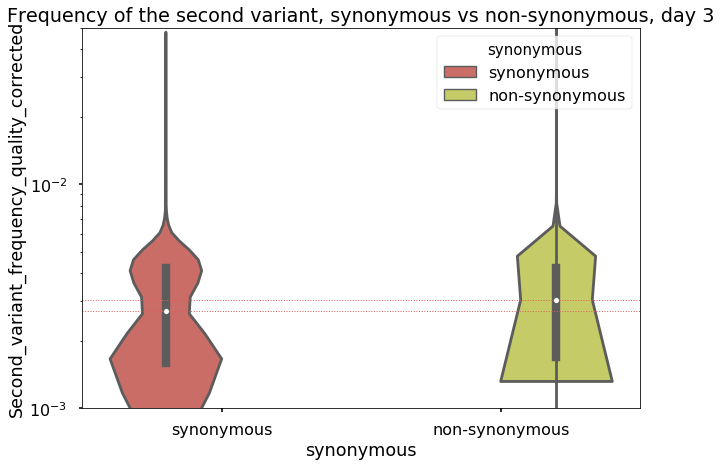

In [85]:
print( DD3_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median())
syn = DD3_A['Second_variant_frequency_quality_corrected'][DD3_A['synonymous']=="synonymous"]
nonsyn = DD3_A['Second_variant_frequency_quality_corrected'][DD3_A['synonymous']=="non-synonymous"]
print("T-test p-value: "+str(ttest_ind(syn, nonsyn)[1]))

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
lm=sns.violinplot(x='synonymous', y="Second_variant_frequency_quality_corrected", data=DD3_A,  hue='synonymous', ax=ax, bw=0.2)
axes = lm.axes
axes.set_ylim(0.001,0.05)
axes.set(yscale="log")

medians = DD3_A.groupby(['synonymous'])['Second_variant_frequency_quality_corrected'].median().values
plt.axhline(y=medians[0], linewidth=1, linestyle=':')
plt.axhline(y=medians[1], linewidth=1, linestyle=':')
# giving title to the plot
plt.title("Frequency of the second variant, synonymous vs non-synonymous, day 3");


The difference in frequencies of the variants do not differ significantly between synonymous and non-synonymous variants at time point 3.

### TLR3 activation, day 9

In [86]:
TD9_A['null'] = (TD9_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
TD9_A['synonymous'] = TD9_A.apply (lambda row: synonymous (row),axis=1)


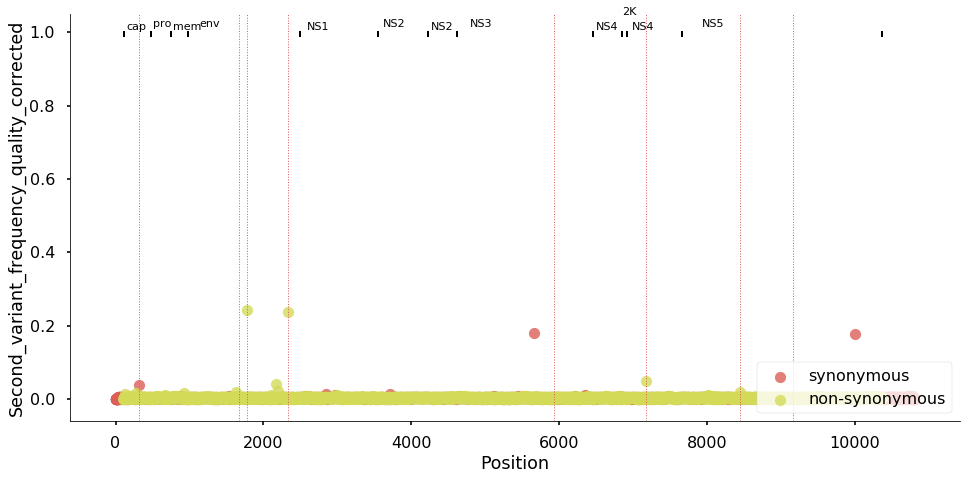

In [87]:
sns.lmplot( x="Position", y="Second_variant_frequency_quality_corrected", data=TD9_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### TLR3 activation, day 12

In [88]:
TD12_A['null'] = (TD12_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
TD12_A['synonymous'] = TD12_A.apply (lambda row: synonymous (row),axis=1)


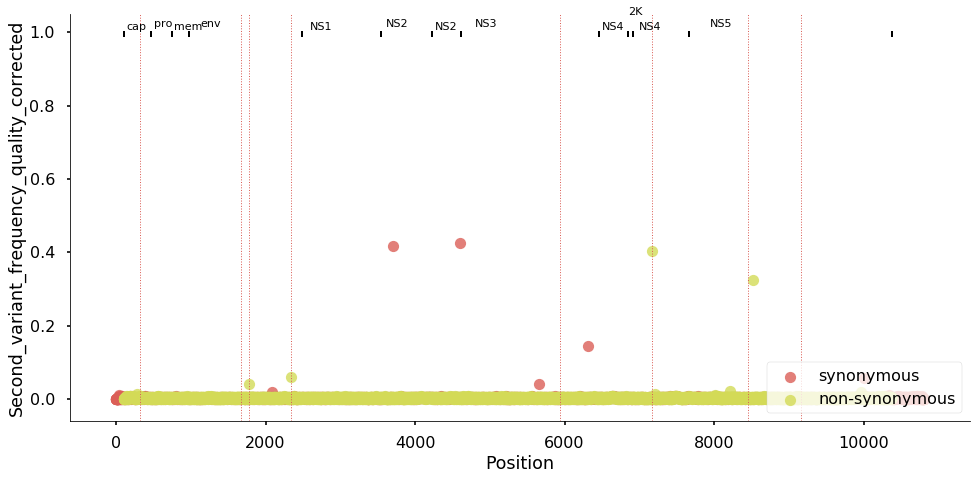

In [89]:
sns.lmplot( x="Position", y="Second_variant_frequency_quality_corrected", data=TD12_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### TLR3 activation, day 24

In [90]:
TD24_A['null'] = (TD24_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
TD24_A['synonymous'] = TD24_A.apply (lambda row: synonymous (row),axis=1)


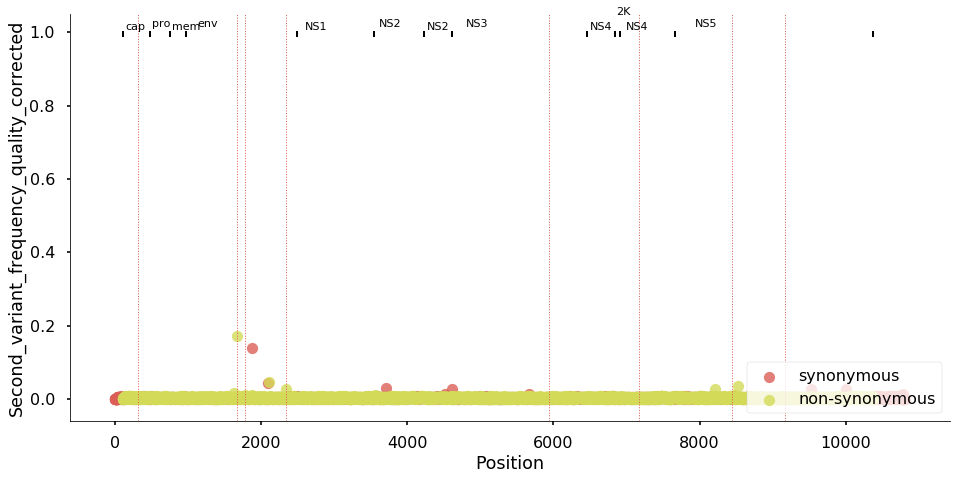

In [91]:
sns.lmplot( x="Position", y="Second_variant_frequency_quality_corrected", data=TD24_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### TLR3 activation, day 51

In [92]:
TD51_A['null'] = (TD51_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
TD51_A['synonymous'] = TD51_A.apply (lambda row: synonymous (row),axis=1)


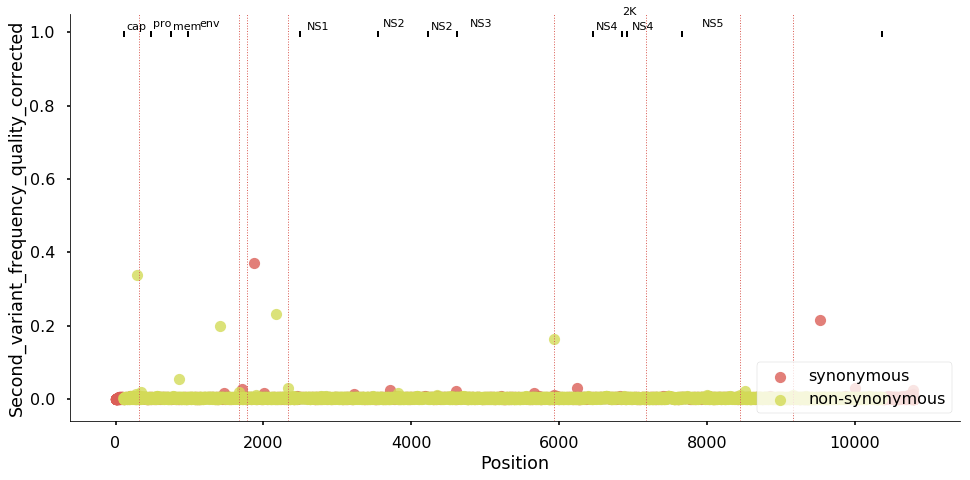

In [93]:
sns.lmplot( x="Position", y="Second_variant_frequency_quality_corrected", data=TD51_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


# Sequences around interesting positions, in control, replicate A, day 12

In [94]:
def get_second_largest_base (li, cons):
    consensus = cons.replace(" ","")
    if consensus=="A":
        li[0] = -1
    elif consensus=="C":
        li[1] = -1
    elif consensus=="G":
        li[2] = -1
    elif consensus=="T":
        li[3] = -1
    if li[0]==li[1]==li[2]==li[3]:
        return "N"
    if max(li) == li[0]:
        return "A"
    elif max(li) == li[1]:
        return "C"
    elif max(li) == li[2]:
        return "G"
    else :
        return "T"

def print_sequence_df (df):
    consensus=""
    mutant=""
    consensus_aa=""
    mutant_aa=""
    for index, row in df.iterrows():
        consensus += row['consensus_sequence']
        mutant += row['mutated_sequence']
        if (index+1) % 3 == 0:
            consensus += ""
            mutant += ""
            consensus_aa += row['consensus_sequence_aa'] + "    "
            mutant_aa += row['mutated_sequence_aa'] + "    "
    print ("Nucleotidic consensus:")
    print(consensus)
    print ("Nucleotidic variant:")
    print(mutant)
    print ("Amino acid consensus:")
    print(consensus_aa)
    print ("Amino acid variant:")
    print(mutant_aa)
    
def extract_sequences_around_position(position, dataframe, length):
    d=pd.DataFrame()
    d['consensus_sequence'] = (dataframe['Major_variant'][position-length:position+length])
    d['consensus_sequence_aa'] = (dataframe['consensus_aa'][position-length:position+length])
    d['mutated_sequence'] = (dataframe['Major_variant'][position-length:position+length])
    d['mutated_sequence'][position] = dataframe['Second_variant'][position]
    #get_second_largest_base([dataframe['qAs'][position],dataframe['qCs'][position],dataframe['qGs'][position],dataframe['qTs'][position]], dataframe['majorsequence'][position])
    d['mutated_sequence_aa'] = dataframe['consensus_aa'][position-length:position+length]
    d['mutated_sequence_aa'][position] = dataframe['secondbase_aa'][position]
    print("\n\n\tPOSITION: "+str(position))
    print_sequence_df(d)
    


In [95]:
for i in positions:
    extract_sequences_around_position(i, DD12_A, 20)



	POSITION: 316
Nucleotidic consensus:
GGTCTCATCAATAGATGGGGCTCAGTGGGGAAAAAAGAGG
Nucleotidic variant:
GGTCTCATCAATAGATGGGGTTCAGTGGGGAAAAAAGAGG
Amino acid consensus:
G    L    I    N    R    W    G    S    V    G    K    K    E    A    
Amino acid variant:
G    L    I    N    R    W    G    S    V    G    K    K    E    A    


	POSITION: 1670
Nucleotidic consensus:
GGCACGCTGGGGCAGACACCGGAACTCCACACTGGAACAA
Nucleotidic variant:
GGCACGCTGGGGCAGACACCTGAACTCCACACTGGAACAA
Amino acid consensus:
H    A    G    A    D    T    G    T    P    H    W    N    N    
Amino acid variant:
H    A    G    A    D    T    STOP    T    P    H    W    N    N    


	POSITION: 1785
Nucleotidic consensus:
AGCAGTTCACACGGCCCTTGCTGGAGCTCTGGAGGCTGAG
Nucleotidic variant:
AGCAGTTCACACGGCCCTTGTTGGAGCTCTGGAGGCTGAG
Amino acid consensus:
A    V    H    T    A    L    A    G    A    L    E    A    E    
Amino acid variant:
A    V    H    T    A    L    A    G    A    L    E    A    E    


	POSITION: 2340
Nucleotidic cons

In [96]:
toVincent = pd.DataFrame()
for d in [DD3_A, DD6_A, DD9_A, DD12_A, DD24_A, DD51_A, DD3_D, DD6_D, DD6_E, DD9_E, DD12_D, DD24_D, TD9_A, TD12_A, TD24_A, TD51_A]:
#    print(d.loc[2340])
#    print(d.loc[7172])
    temp_316 = d[d['Unnamed: 0']==316]    
    temp_2340 = d[d['Unnamed: 0']==2340]
    temp_7172 = d[d['Unnamed: 0']==7172]
    temp_9165 = d[d['Unnamed: 0']==9165]    
    toVincent=pd.concat([toVincent,temp_316])
    toVincent=pd.concat([toVincent,temp_2340])
    toVincent=pd.concat([toVincent,temp_7172])
    toVincent=pd.concat([toVincent,temp_9165])
expnames=["DD3_A", "DD3_A","DD3_A", "DD3_A","DD6_A", "DD6_A", "DD6_A", "DD6_A", "DD9_A", "DD9_A", "DD9_A", "DD9_A", "DD12_A", "DD12_A", "DD12_A", "DD12_A", "DD24_A", "DD24_A", "DD24_A", "DD24_A", "DD51_A", "DD51_A", "DD51_A", "DD51_A", "DD3_D", "DD3_D", "DD3_D", "DD3_D", "DD6_D", "DD6_D", "DD6_D", "DD6_D", "DD6_E", "DD6_E", "DD6_E", "DD6_E", "DD9_E", "DD9_E", "DD9_E", "DD9_E", "DD12_D", "DD12_D", "DD12_D", "DD12_D", "DD24_D", "DD24_D", "DD24_D", "DD24_D", "TD9_A", "TD9_A", "TD9_A", "TD9_A", "TD12_A", "TD12_A", "TD12_A", "TD12_A", "TD24_A", "TD24_A", "TD24_A", "TD24_A", "TD51_A", "TD51_A", "TD51_A", "TD51_A"]
toVincent['expName']=expnames
toVincent.to_csv( "pos_316_2340_7172_9165.csv")
